# Imports And Consts

In [1]:
import functions
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.feature_selection import f_classif, mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Load Data

load the training and test data in a format specified by task description

In [2]:
with open("./Dataset/x_test.txt") as file:
    X_test = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/x_train.txt") as file:
    X_train = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/y_train.txt") as file:
    y_train = [[float(digit) for digit in line.split()] for line in file]

In the X_test there are 500 features and 5000 observations, y_train contains 5000 values, X_train contains 500 features and 5000 observations

In [3]:
print("X_test datapoints:", len(X_test), " features:", len(X_test[0]))
print("X_train datapoints:", len(X_train), " features:", len(X_train[0]))
print("y_train datapoints:", len(y_train))

X_test datapoints: 5000  features: 500
X_train datapoints: 5000  features: 500
y_train datapoints: 5000


# Batch 1

## Consts

In [4]:
RESULTS_FILENAME = "./Results/Limited/results-1"

## Experiment

### Parameters

In [5]:
# LDA
solver = ["svd"]
ldaParameters = functions.generateParameters([solver], globals())

# QDA
qdaParameters = [{}]

# KNN
n_neighbors = [5]
knnParameters = functions.generateParameters([n_neighbors], globals())

# SVC
svcParameters = [{}]

# HistGradientBoosting
histGradientBoostingParameters = [{}]


# GradientBoosting
gradientBoostingParameters = [{}]


# MLPClassifier
mlpClassifierParameters = [{}]

# Voting?


models = [
    {"model": functions.ModelType.LDA, "parameters": ldaParameters},
    {"model": functions.ModelType.QDA, "parameters": qdaParameters},
    {"model": functions.ModelType.KNN, "parameters": knnParameters},
    {"model": functions.ModelType.SVC, "parameters": svcParameters},
    {
        "model": functions.ModelType.GradientBoosting,
        "parameters": gradientBoostingParameters,
    },
    {
        "model": functions.ModelType.HistGradientBoosting,
        "parameters": histGradientBoostingParameters,
    },
    {"model": functions.ModelType.MLPClassifier, "parameters": mlpClassifierParameters},
]

In [6]:
# KBest
k = [5, 10, 20, 40, 80]
score_func = [f_classif, mutual_info_classif]
kBestParameters = functions.generateParameters([score_func, k], globals())


featureSelectors = [
    {"model": functions.FeatureSelectorType.NoFeatureSelection, "parameters": [{}]},
    {"model": functions.FeatureSelectorType.KBest, "parameters": kBestParameters},
]

### Conducting the experiment

In [7]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [8]:
%%time
results = functions.conductExperiments(
    models=models,
    featureSelectors=featureSelectors,
    X_orig=X_train,
    y_orig=y_train_ravel,
    getLimitedScore=True,
)
with open(RESULTS_FILENAME, "wb") as f:
    pickle.dump(results, f)

Performed Experiment 1/77(approx) took (s): model: 3.91 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.LDA {'solver': 'svd'}


c:\Users\prusak.patryk\Projects\Uni\advml-proj-2\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Performed Experiment 2/77(approx) took (s): model: 1.08 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.QDA {}
Performed Experiment 3/77(approx) took (s): model: 0.77 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.KNN {'n_neighbors': 5}
!!!Experiment failed for: FeatureSelectorType.NoFeatureSelection {} ModelType.SVC {} This 'SVC' has no attribute 'predict_proba'
Performed Experiment 4/77(approx) took (s): model: 62.13 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.GradientBoosting {}
Performed Experiment 5/77(approx) took (s): model: 5.8 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.HistGradientBoosting {}
Performed Experiment 6/77(approx) took (s): model: 8.15 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.MLPClassifier {}
Performed Experiment 7/77(approx) took (s): model: 0.0 selector 0.2 with: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x00000

c:\Users\prusak.patryk\Projects\Uni\advml-proj-2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Performed Experiment 24/77(approx) took (s): model: 6.02 selector 0.16 with: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x000001A9D13EE8E0>, 'k': 20} ModelType.MLPClassifier {}
Performed Experiment 25/77(approx) took (s): model: 0.28 selector 0.23 with: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x000001A9D13EE8E0>, 'k': 40} ModelType.LDA {'solver': 'svd'}
Performed Experiment 26/77(approx) took (s): model: 0.03 selector 0.23 with: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x000001A9D13EE8E0>, 'k': 40} ModelType.QDA {}
Performed Experiment 27/77(approx) took (s): model: 0.02 selector 0.23 with: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x000001A9D13EE8E0>, 'k': 40} ModelType.KNN {'n_neighbors': 5}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x000001A9D13EE8E0>, 'k': 40} ModelType.SVC {} This 'SVC' has no attribute 'predict_proba'
Performed Experiment 28/77

c:\Users\prusak.patryk\Projects\Uni\advml-proj-2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Performed Experiment 30/77(approx) took (s): model: 5.68 selector 0.23 with: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x000001A9D13EE8E0>, 'k': 40} ModelType.MLPClassifier {}
Performed Experiment 31/77(approx) took (s): model: 1.17 selector 0.2 with: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x000001A9D13EE8E0>, 'k': 80} ModelType.LDA {'solver': 'svd'}
Performed Experiment 32/77(approx) took (s): model: 0.11 selector 0.2 with: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x000001A9D13EE8E0>, 'k': 80} ModelType.QDA {}
Performed Experiment 33/77(approx) took (s): model: 0.03 selector 0.2 with: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x000001A9D13EE8E0>, 'k': 80} ModelType.KNN {'n_neighbors': 5}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x000001A9D13EE8E0>, 'k': 80} ModelType.SVC {} This 'SVC' has no attribute 'predict_proba'
Performed Experiment 34/77(ap

c:\Users\prusak.patryk\Projects\Uni\advml-proj-2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Performed Experiment 36/77(approx) took (s): model: 6.63 selector 0.2 with: FeatureSelectorType.KBest {'score_func': <function f_classif at 0x000001A9D13EE8E0>, 'k': 80} ModelType.MLPClassifier {}
Performed Experiment 37/77(approx) took (s): model: 0.01 selector 10.22 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 5} ModelType.LDA {'solver': 'svd'}
Performed Experiment 38/77(approx) took (s): model: 0.0 selector 10.22 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 5} ModelType.QDA {}
Performed Experiment 39/77(approx) took (s): model: 0.02 selector 10.22 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 5} ModelType.KNN {'n_neighbors': 5}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 5} ModelType.SVC {} This 'SVC' has no attribute 'pred

c:\Users\prusak.patryk\Projects\Uni\advml-proj-2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Performed Experiment 42/77(approx) took (s): model: 4.33 selector 10.22 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 5} ModelType.MLPClassifier {}
Performed Experiment 43/77(approx) took (s): model: 0.02 selector 8.33 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 10} ModelType.LDA {'solver': 'svd'}
Performed Experiment 44/77(approx) took (s): model: 0.0 selector 8.33 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 10} ModelType.QDA {}
Performed Experiment 45/77(approx) took (s): model: 0.03 selector 8.33 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 10} ModelType.KNN {'n_neighbors': 5}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 10} ModelType.SVC {} This 'SVC' has no att

c:\Users\prusak.patryk\Projects\Uni\advml-proj-2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Performed Experiment 48/77(approx) took (s): model: 3.46 selector 8.33 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 10} ModelType.MLPClassifier {}
Performed Experiment 49/77(approx) took (s): model: 0.01 selector 7.77 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 20} ModelType.LDA {'solver': 'svd'}
Performed Experiment 50/77(approx) took (s): model: 0.01 selector 7.77 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 20} ModelType.QDA {}
Performed Experiment 51/77(approx) took (s): model: 0.02 selector 7.77 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 20} ModelType.KNN {'n_neighbors': 5}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 20} ModelType.SVC {} This 'SVC' has no at

c:\Users\prusak.patryk\Projects\Uni\advml-proj-2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Performed Experiment 54/77(approx) took (s): model: 4.67 selector 7.77 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 20} ModelType.MLPClassifier {}
Performed Experiment 55/77(approx) took (s): model: 0.02 selector 7.56 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 40} ModelType.LDA {'solver': 'svd'}
Performed Experiment 56/77(approx) took (s): model: 0.02 selector 7.56 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 40} ModelType.QDA {}
Performed Experiment 57/77(approx) took (s): model: 0.02 selector 7.56 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 40} ModelType.KNN {'n_neighbors': 5}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 40} ModelType.SVC {} This 'SVC' has no at

c:\Users\prusak.patryk\Projects\Uni\advml-proj-2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Performed Experiment 60/77(approx) took (s): model: 4.93 selector 7.56 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 40} ModelType.MLPClassifier {}
Performed Experiment 61/77(approx) took (s): model: 0.07 selector 8.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 80} ModelType.LDA {'solver': 'svd'}
Performed Experiment 62/77(approx) took (s): model: 0.08 selector 8.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 80} ModelType.QDA {}
Performed Experiment 63/77(approx) took (s): model: 0.03 selector 8.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 80} ModelType.KNN {'n_neighbors': 5}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001A9D13ECC20>, 'k': 80} ModelType.SVC {} This 'SVC' has no at

c:\Users\prusak.patryk\Projects\Uni\advml-proj-2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Results

In [9]:
with open(RESULTS_FILENAME, "rb") as input_file:
    results = pickle.load(input_file)

In [10]:
resultsDf = pd.DataFrame(
    results,
    columns=functions.RESULTS_COLUMNS,
)

### Detailed Results

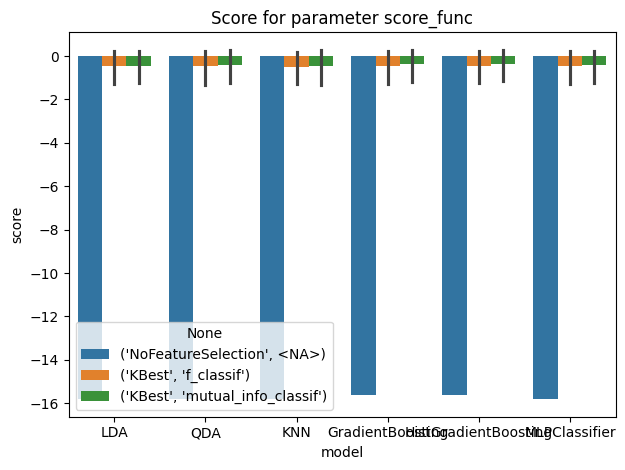

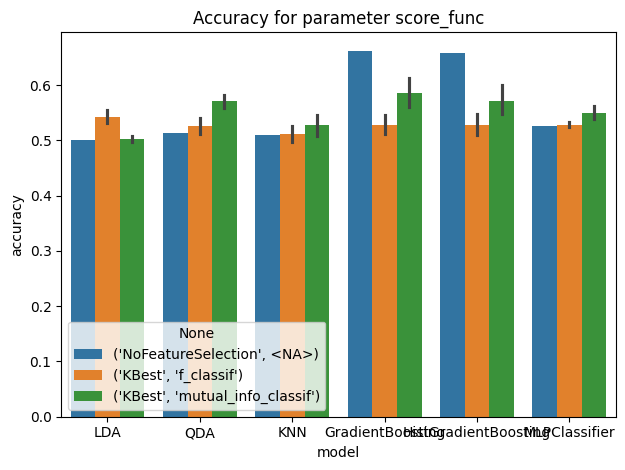

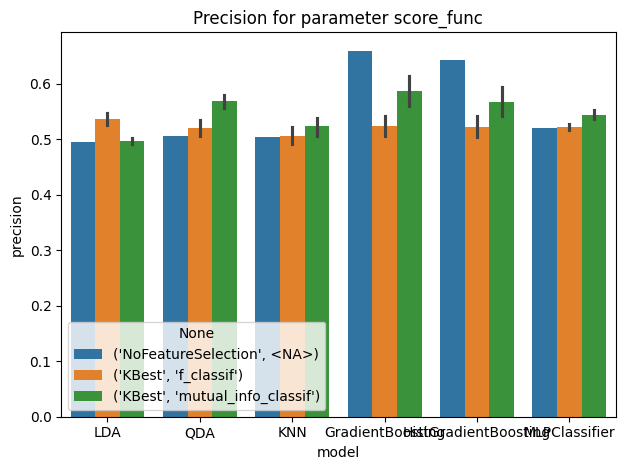

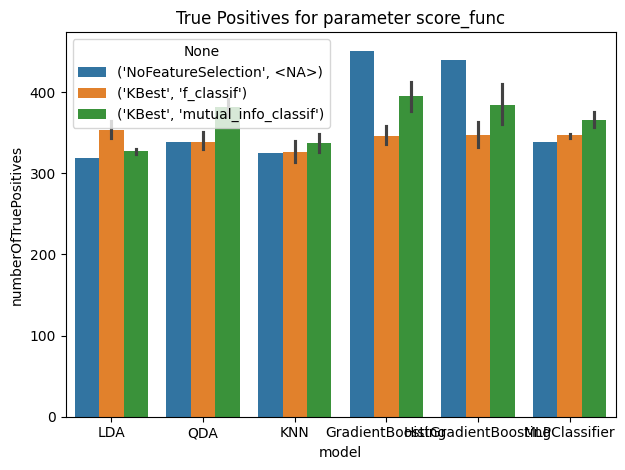

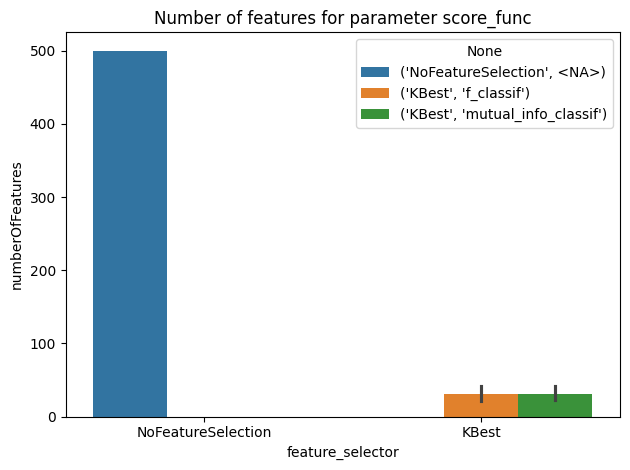

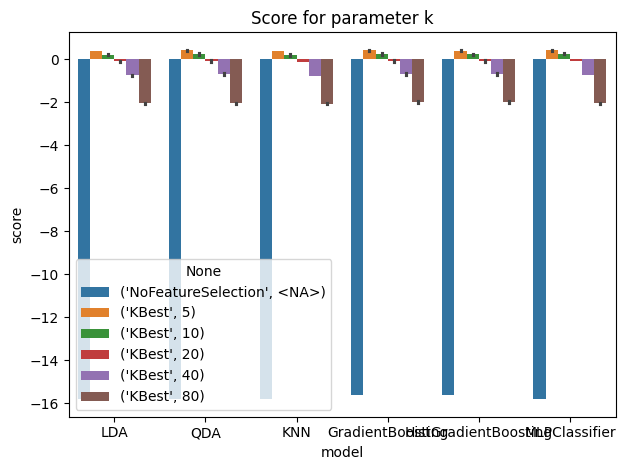

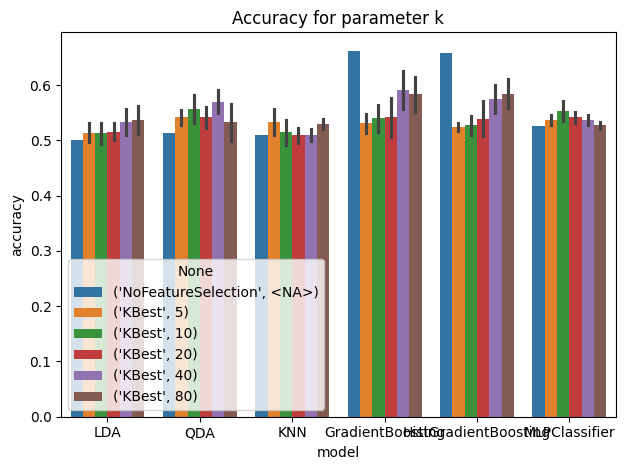

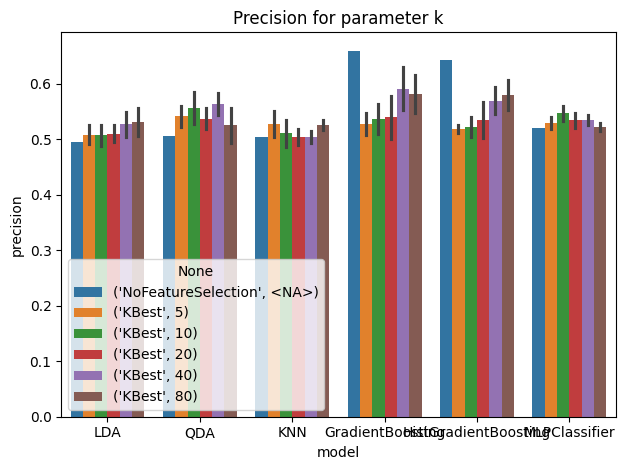

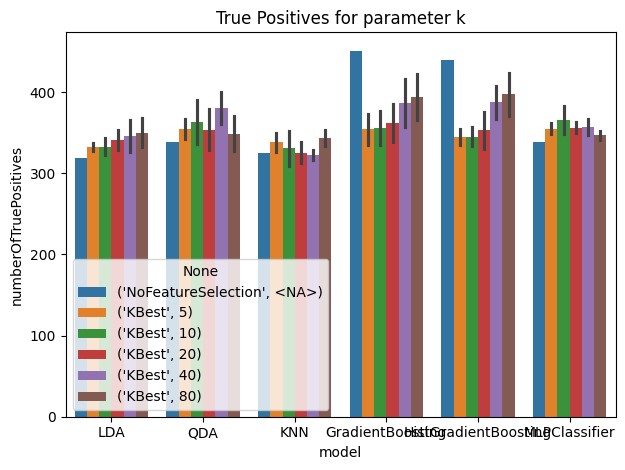

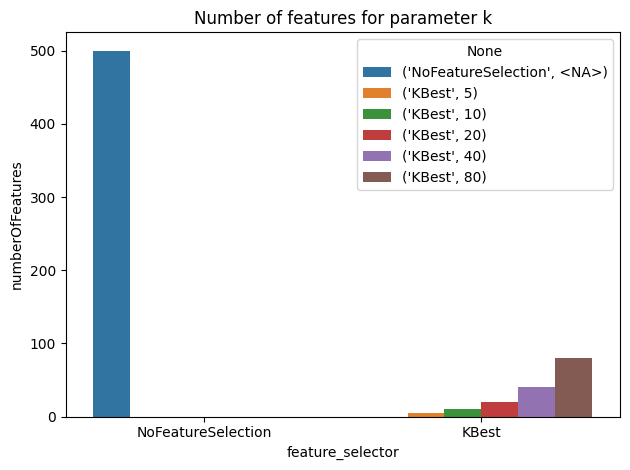

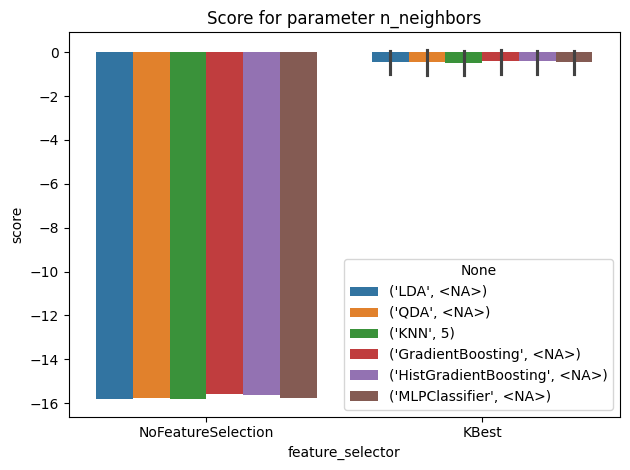

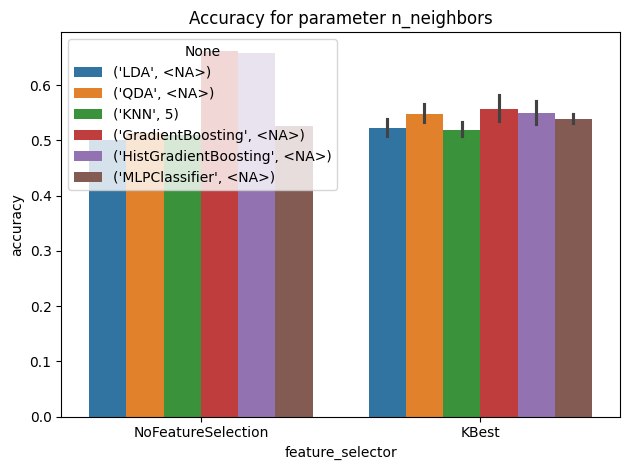

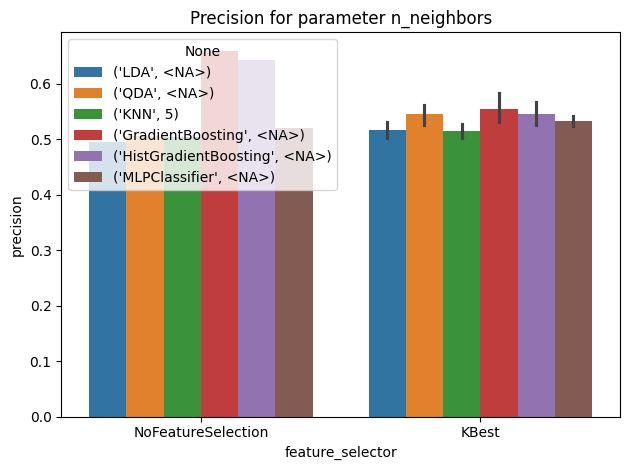

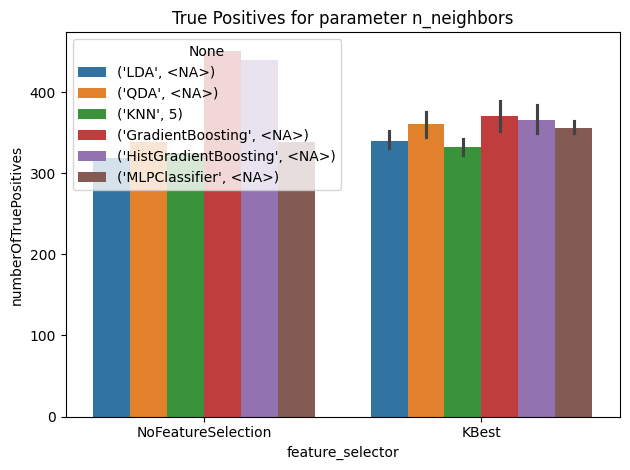

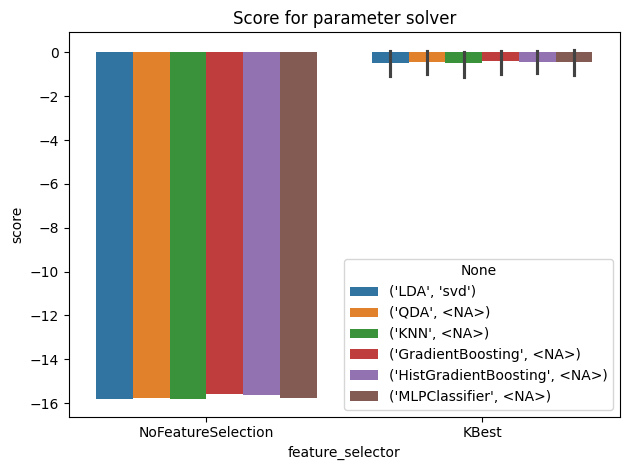

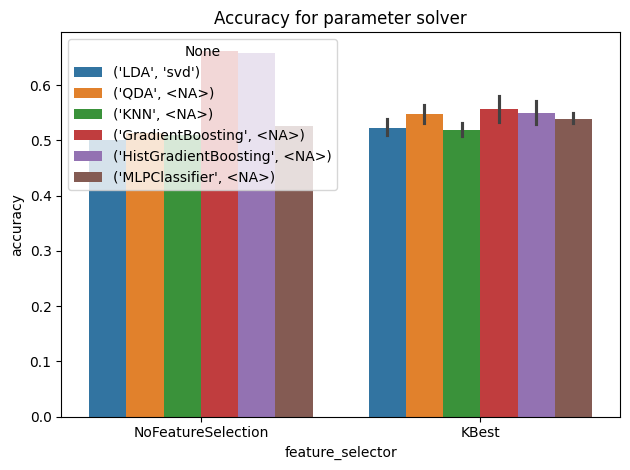

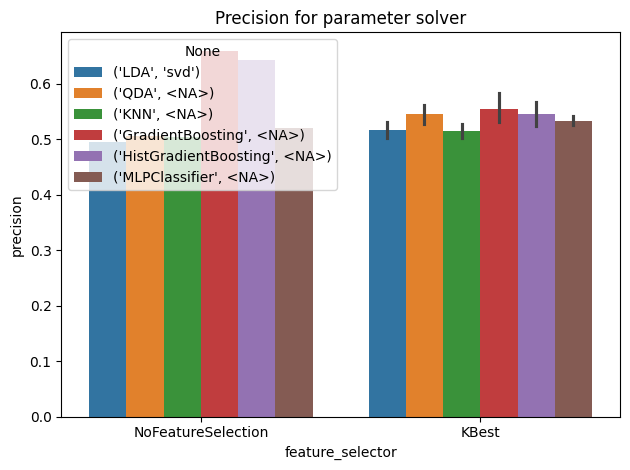

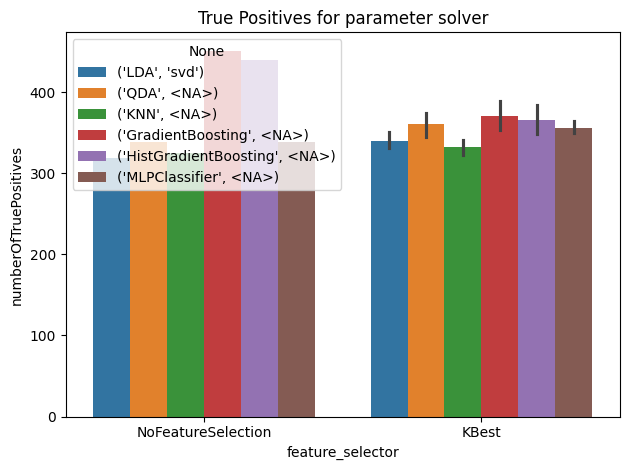

CPU times: total: 3.83 s
Wall time: 7.08 s


In [11]:
%%time
processedResultsDf, parameters = functions.extractParameterResults(
    resultsDf, models, featureSelectors
)
functions.drawParameterResultsBarplot(processedResultsDf, parameters)

### Score/Accuracy by number of features

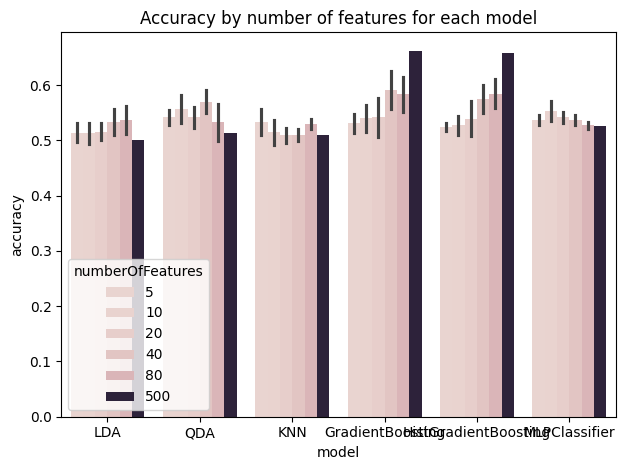

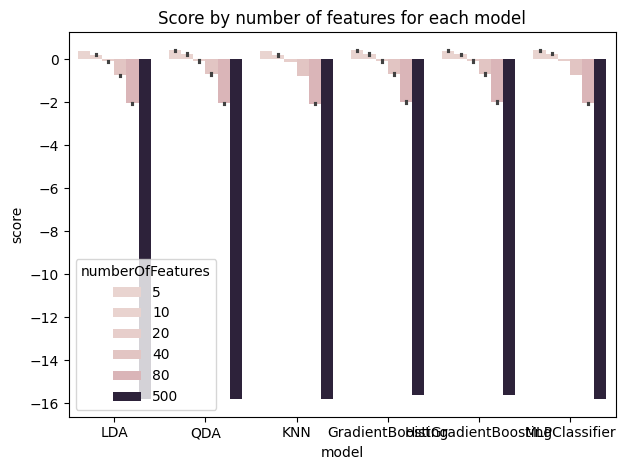

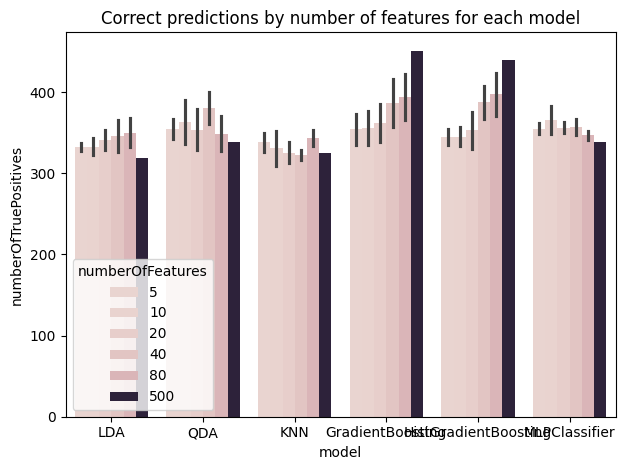

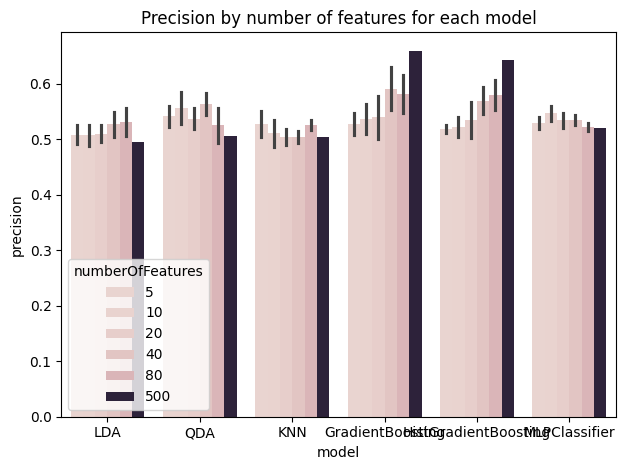

In [12]:
functions.drawResultsPerNumberOfFeatures(processedResultsDf)

### Final Results for Feature Selectors

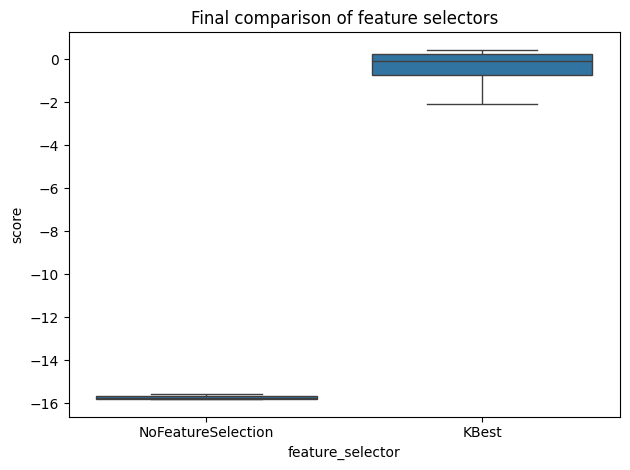

In [13]:
plt.title("Final comparison of feature selectors")
sns.boxplot(data=processedResultsDf, x="feature_selector", y="score")

plt.tight_layout()
plt.show()

### Final Results for Models

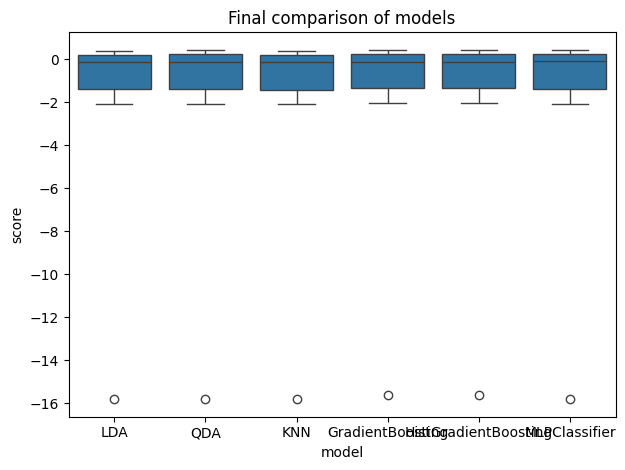

In [14]:
plt.title("Final comparison of models")
sns.boxplot(data=processedResultsDf, x="model", y="score")

plt.tight_layout()
plt.show()

### Final Results

In [15]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 0 ns


In [16]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
39  0.446078                    373  0.547879   0.547297                 5   

               model model_parameters feature_selector  \
39  GradientBoosting               {}            KBest   

                                  selector_parameters  \
39  {'score_func': <function mutual_info_classif a...   

   selector_parameters_score_func selector_parameters_k  \
39            mutual_info_classif                     5   

   model_parameters_n_neighbors model_parameters_solver  
39                         <NA>                    <NA>

# Batch 2

## Consts

In [ ]:
RESULTS_FILENAME = "./Results/Limited/results-2"

## Experiment

### Parameters

In [ ]:
# LDA
solver = ["svd"]
ldaParameters = functions.generateParameters([solver], globals())

# QDA
qdaParameters = [{}]

# KNN
n_neighbors = [5]
knnParameters = functions.generateParameters([n_neighbors], globals())

# SVC
svcParameters = [{}]

# HistGradientBoosting
histGradientBoostingParameters = [{}]


# GradientBoosting
gradientBoostingParameters = [{}]


# MLPClassifier
mlpClassifierParameters = [{}]

# Voting?


models = [
    {"model": functions.ModelType.LDA, "parameters": ldaParameters},
    {"model": functions.ModelType.QDA, "parameters": qdaParameters},
    {"model": functions.ModelType.KNN, "parameters": knnParameters},
    {"model": functions.ModelType.SVC, "parameters": svcParameters},
    {
        "model": functions.ModelType.GradientBoosting,
        "parameters": gradientBoostingParameters,
    },
    {
        "model": functions.ModelType.HistGradientBoosting,
        "parameters": histGradientBoostingParameters,
    },
    {"model": functions.ModelType.MLPClassifier, "parameters": mlpClassifierParameters},
]

In [ ]:
# KBest
k = [2, 5, 10]
score_func = [mutual_info_classif]
kBestParameters = functions.generateParameters([score_func, k], globals())

# FPR

# mutual_info_classif seems to break for FPR but maybe try to run these without StandardScaler?
score_func = [f_classif]
alpha = [0.01, 0.05, 0.1, 0.2]
fprParameters = functions.generateParameters([score_func, alpha], globals())

# FDR
score_func = [f_classif]
alpha = [0.01, 0.05, 0.1, 0.2]
fdrParameters = functions.generateParameters([score_func, alpha], globals())

# FWE
score_func = [f_classif]
alpha = [0.01, 0.05, 0.1, 0.2]
fweParameters = functions.generateParameters([score_func, alpha], globals())


featureSelectors = [
    {"model": functions.FeatureSelectorType.NoFeatureSelection, "parameters": [{}]},
    {"model": functions.FeatureSelectorType.KBest, "parameters": kBestParameters},
    {"model": functions.FeatureSelectorType.FPR, "parameters": fprParameters},
    {"model": functions.FeatureSelectorType.FDR, "parameters": fdrParameters},
    {"model": functions.FeatureSelectorType.FWE, "parameters": fweParameters},
]

### Conducting the experiment

In [ ]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [ ]:
%%time
results = functions.conductExperiments(
    models=models,
    featureSelectors=featureSelectors,
    X_orig=X_train,
    y_orig=y_train_ravel,
    getLimitedScore=True,
)
with open(RESULTS_FILENAME, "wb") as f:
    pickle.dump(results, f)

Performed Experiment 1/96(approx) took (s): model: 0.92 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.LDA {'solver': 'svd'}


c:\Users\prusak.patryk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Performed Experiment 2/96(approx) took (s): model: 1.88 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.QDA {}
Performed Experiment 3/96(approx) took (s): model: 0.41 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.KNN {'n_neighbors': 5}
Performed Experiment 4/96(approx) took (s): model: 6.17 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.SVC {}
Performed Experiment 5/96(approx) took (s): model: 80.62 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.GradientBoosting {}
Performed Experiment 6/96(approx) took (s): model: 6.61 selector 0.0 with: FeatureSelectorType.NoFeatureSelection {} ModelType.HistGradientBoosting {}
Performed Experiment 7/96(approx) took (s): model: 0.0 selector 10.15 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.LDA {'solver': 'svd'}
Performed Experiment 8/96(approx) took (s): model: 0.0 selector 10.15 wi

c:\Users\prusak.patryk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_base.py:121: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
c:\Users\prusak.patryk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_base.py:121: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


!!! FeatureSelectorType.FDR produced 1 or fewer features with parameters: {'score_func': <function f_classif at 0x00000231A354E8E0>, 'alpha': 0.01}
!!! FeatureSelectorType.FDR produced 1 or fewer features with parameters: {'score_func': <function f_classif at 0x00000231A354E8E0>, 'alpha': 0.05}


c:\Users\prusak.patryk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_base.py:121: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
c:\Users\prusak.patryk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_base.py:121: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


!!! FeatureSelectorType.FDR produced 1 or fewer features with parameters: {'score_func': <function f_classif at 0x00000231A354E8E0>, 'alpha': 0.1}
!!! FeatureSelectorType.FDR produced 1 or fewer features with parameters: {'score_func': <function f_classif at 0x00000231A354E8E0>, 'alpha': 0.2}


c:\Users\prusak.patryk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_base.py:121: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
c:\Users\prusak.patryk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_base.py:121: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


!!! FeatureSelectorType.FWE produced 1 or fewer features with parameters: {'score_func': <function f_classif at 0x00000231A354E8E0>, 'alpha': 0.01}
!!! FeatureSelectorType.FWE produced 1 or fewer features with parameters: {'score_func': <function f_classif at 0x00000231A354E8E0>, 'alpha': 0.05}
!!! FeatureSelectorType.FWE produced 1 or fewer features with parameters: {'score_func': <function f_classif at 0x00000231A354E8E0>, 'alpha': 0.1}
!!! FeatureSelectorType.FWE produced 1 or fewer features with parameters: {'score_func': <function f_classif at 0x00000231A354E8E0>, 'alpha': 0.2}
CPU times: total: 3min 9s
Wall time: 2min 51s


c:\Users\prusak.patryk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_base.py:121: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
c:\Users\prusak.patryk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_base.py:121: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


## Results

In [ ]:
with open(RESULTS_FILENAME, "rb") as input_file:
    results = pickle.load(input_file)

In [ ]:
resultsDf = pd.DataFrame(
    results,
    columns=functions.RESULTS_COLUMNS,
)

### Detailed Results

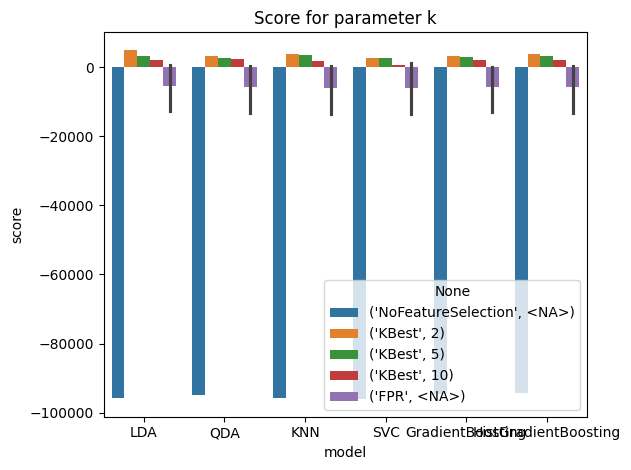

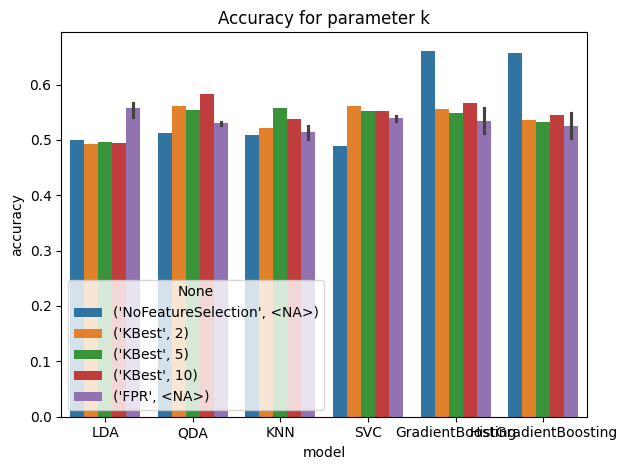

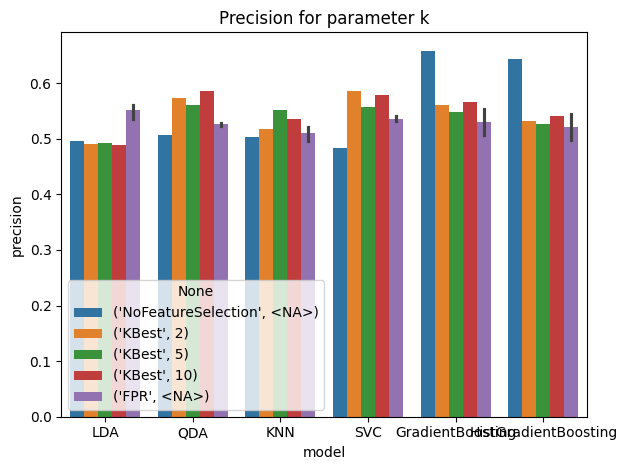

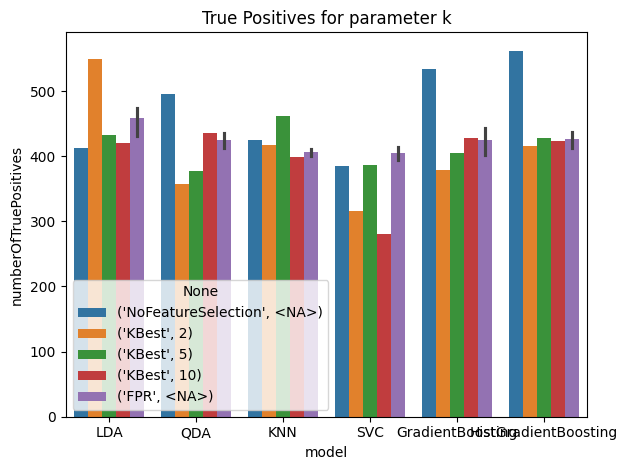

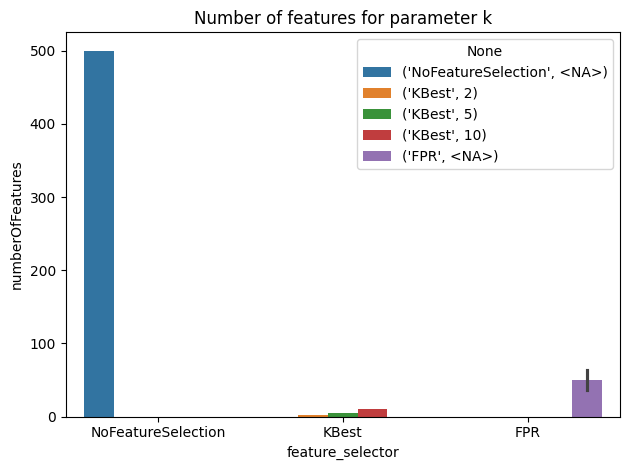

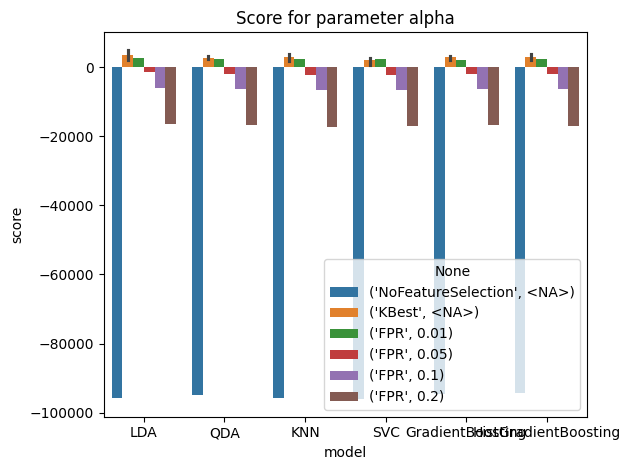

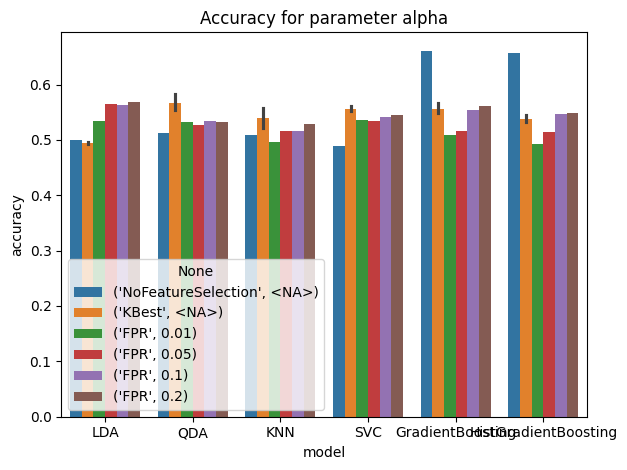

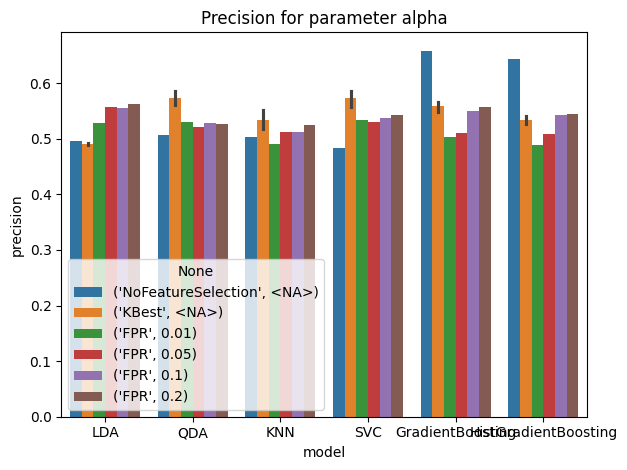

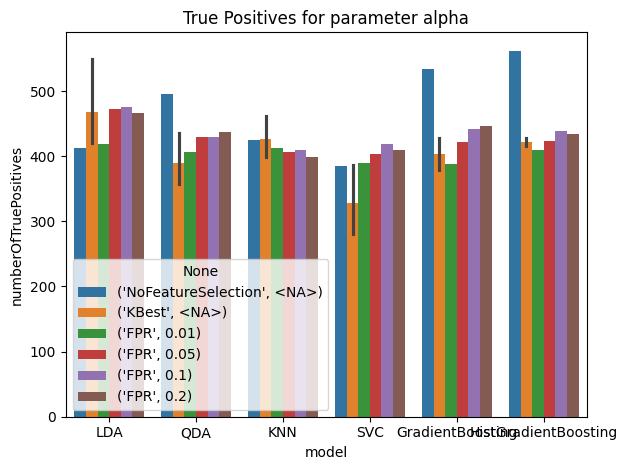

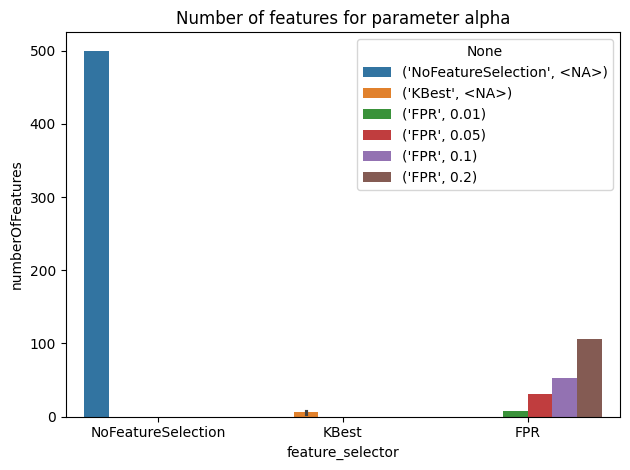

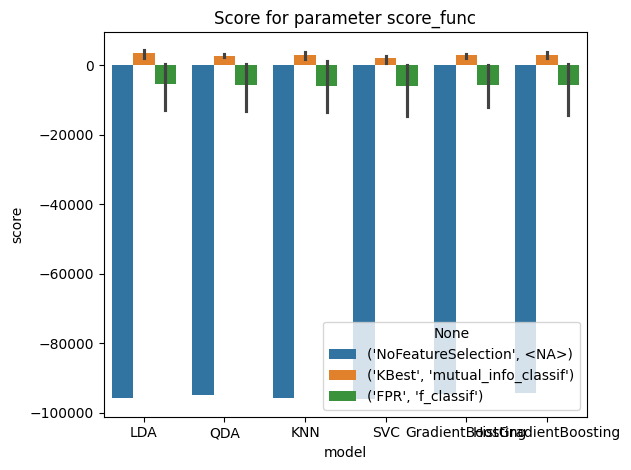

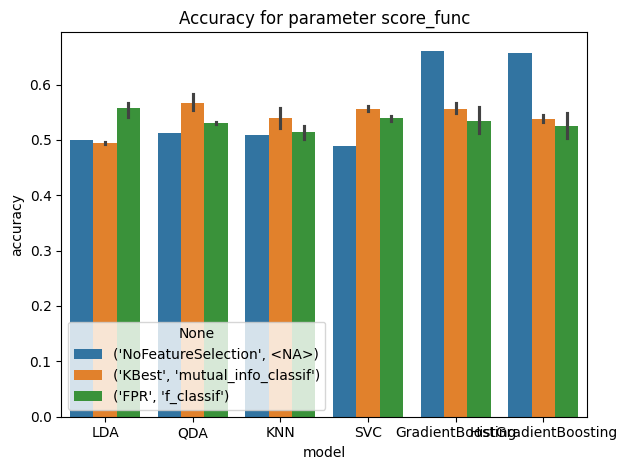

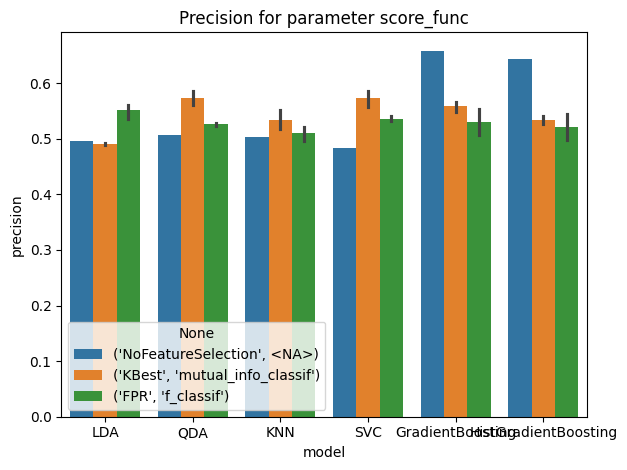

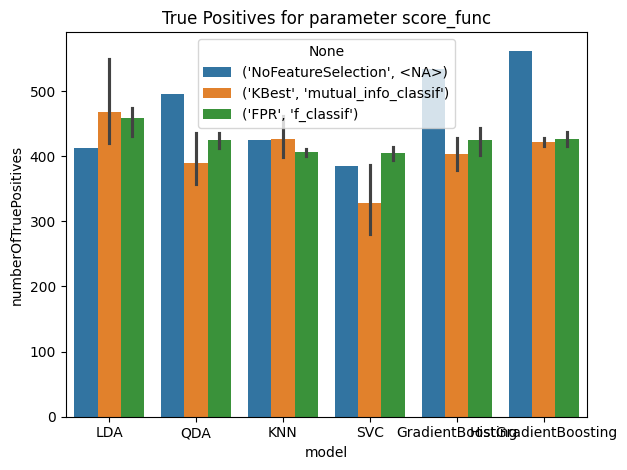

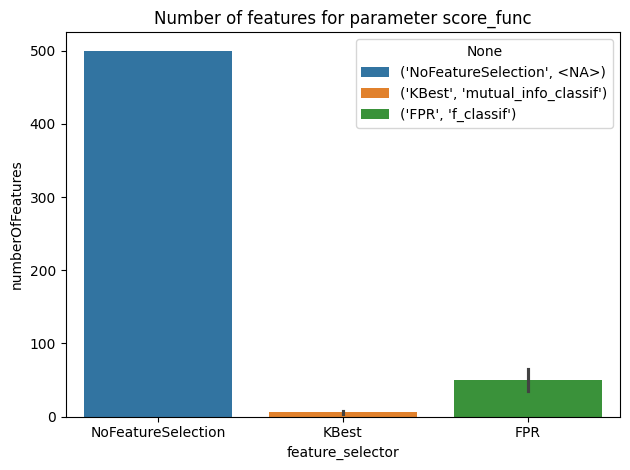

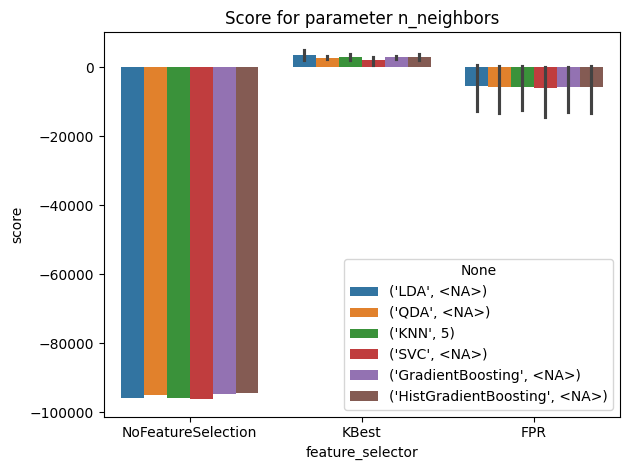

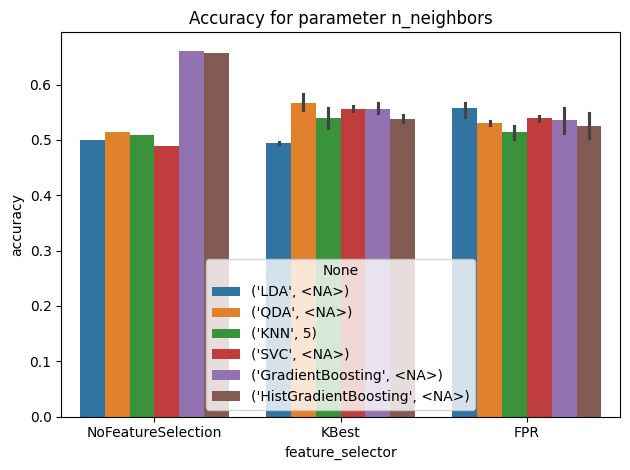

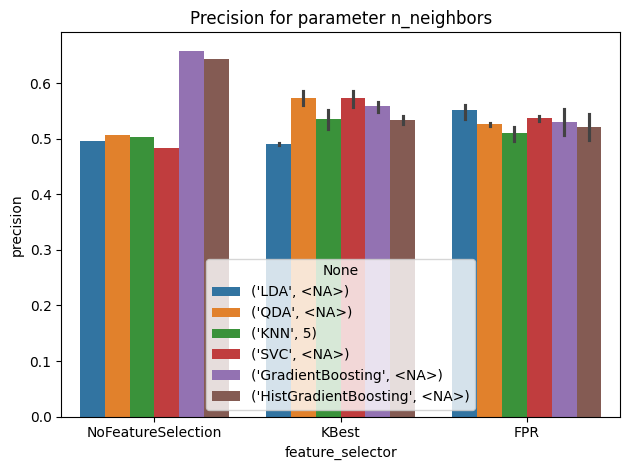

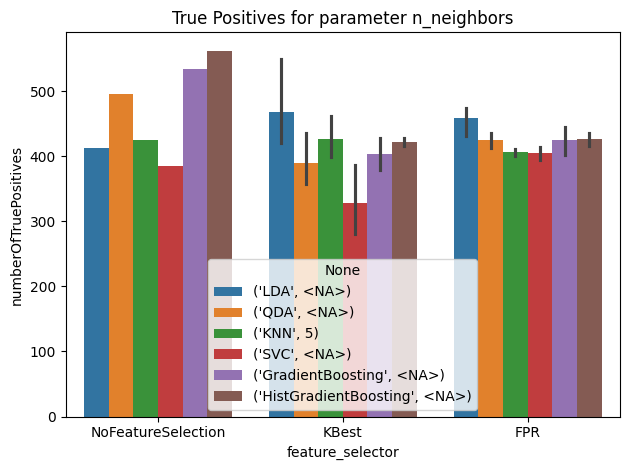

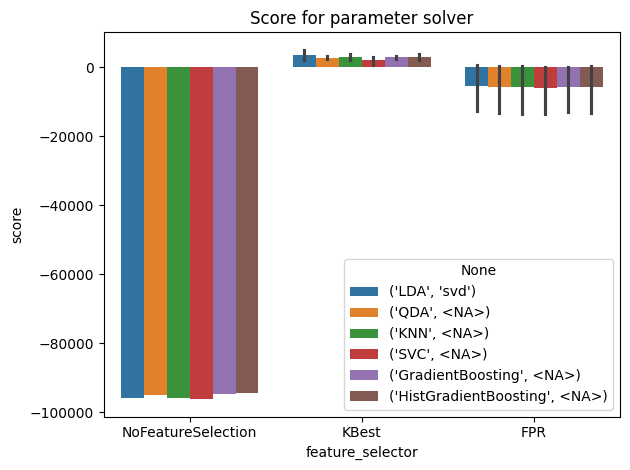

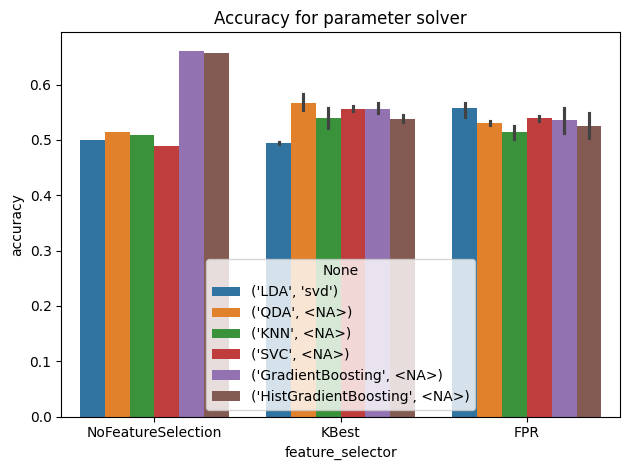

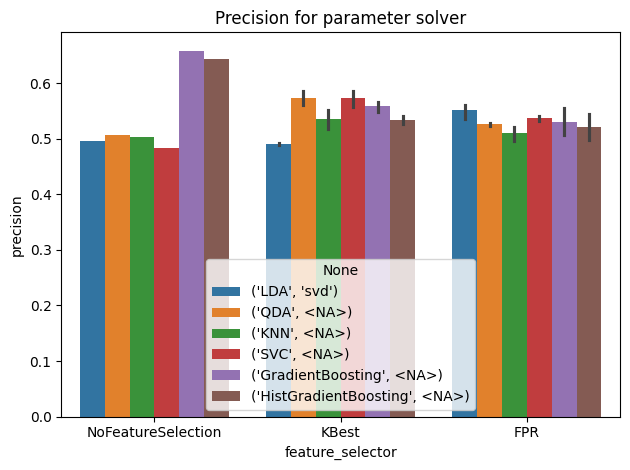

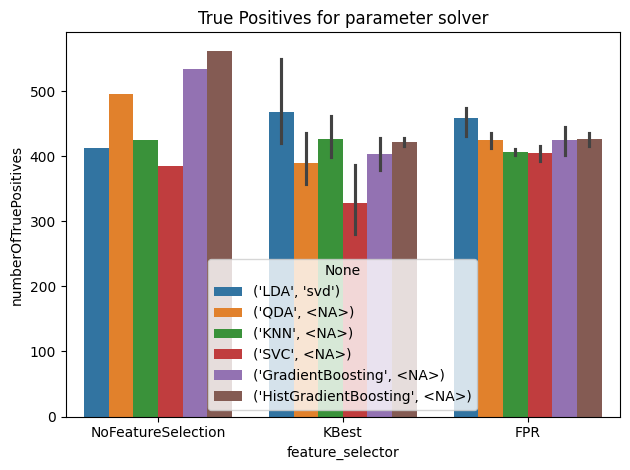

CPU times: total: 5.73 s
Wall time: 10.6 s


In [ ]:
%%time
processedResultsDf, parameters = functions.extractParameterResults(
    resultsDf, models, featureSelectors
)
functions.drawParameterResultsBarplot(processedResultsDf, parameters)

### Score/Accuracy by number of features

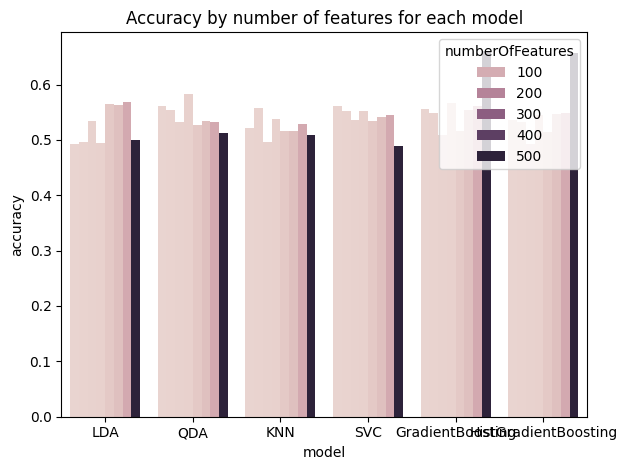

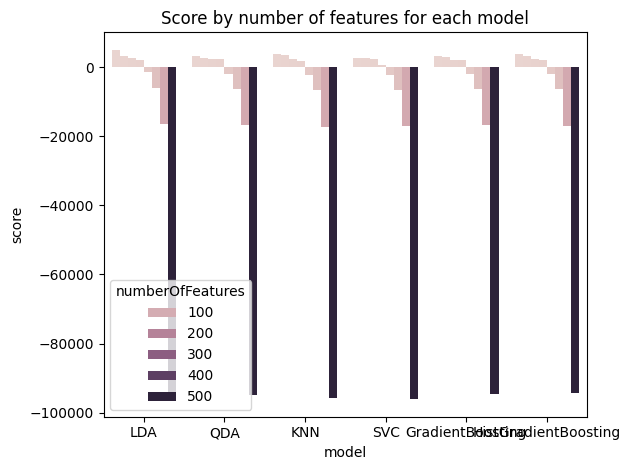

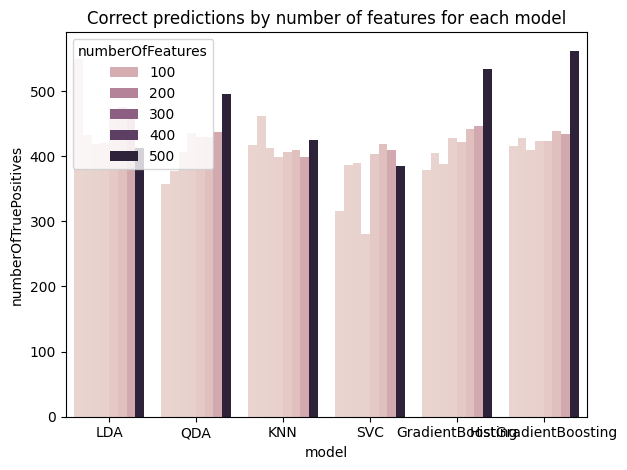

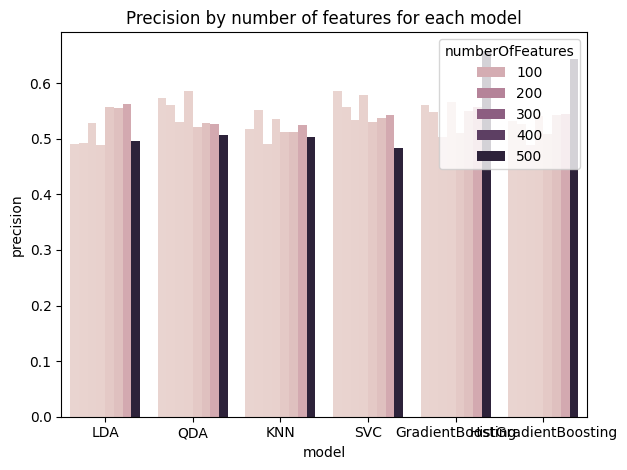

In [ ]:
functions.drawResultsPerNumberOfFeatures(processedResultsDf)

### Final Results for Feature Selectors

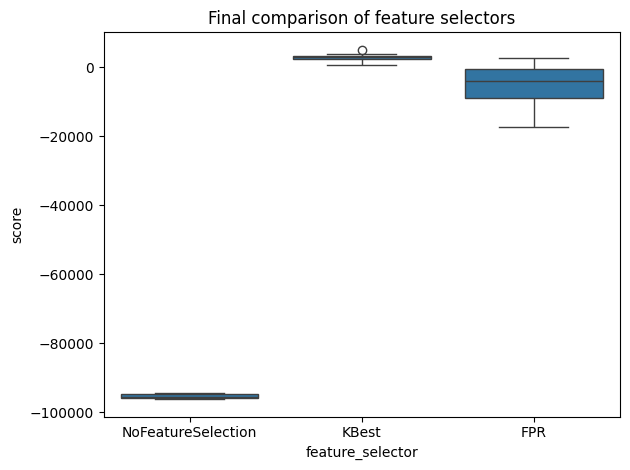

In [ ]:
plt.title("Final comparison of feature selectors")
sns.boxplot(data=processedResultsDf, x="feature_selector", y="score")

plt.tight_layout()
plt.show()

### Final Results for Models

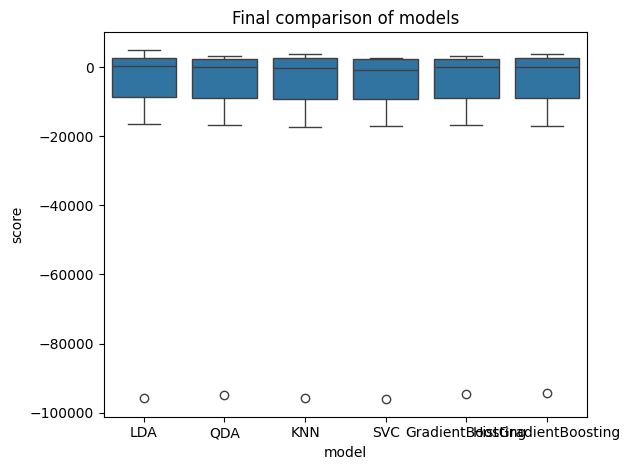

In [ ]:
plt.title("Final comparison of models")
sns.boxplot(data=processedResultsDf, x="model", y="score")

plt.tight_layout()
plt.show()

### Final Results

In [ ]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 1.05 ms


In [ ]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures model  \
6   5090                    549  0.492727   0.490617                 2   LDA   

    model_parameters feature_selector  \
6  {'solver': 'svd'}            KBest   

                                 selector_parameters selector_parameters_k  \
6  {'score_func': <function mutual_info_classif a...                     2   

  selector_parameters_alpha selector_parameters_score_func  \
6                      <NA>            mutual_info_classif   

  model_parameters_n_neighbors model_parameters_solver  
6                         <NA>                     svd

# Batch 3

## Consts

In [ ]:
RESULTS_FILENAME = "./Results/Limited/results-3"

## Experiment

### Parameters

In [ ]:
# LDA
solver = ["svd"]
ldaParameters = functions.generateParameters([solver], globals())

# QDA
qdaParameters = [{}]

# KNN
n_neighbors = [5]
knnParameters = functions.generateParameters([n_neighbors], globals())

# SVC
svcParameters = [{}]

# HistGradientBoosting
histGradientBoostingParameters = [{}]


# GradientBoosting
gradientBoostingParameters = [{}]

# MLPClassifier
mlpClassifierParameters = [{}]

# Voting?


models = [
    {"model": functions.ModelType.LDA, "parameters": ldaParameters},
    {"model": functions.ModelType.QDA, "parameters": qdaParameters},
    {"model": functions.ModelType.KNN, "parameters": knnParameters},
    {"model": functions.ModelType.SVC, "parameters": svcParameters},
    {
        "model": functions.ModelType.GradientBoosting,
        "parameters": gradientBoostingParameters,
    },
    {
        "model": functions.ModelType.HistGradientBoosting,
        "parameters": histGradientBoostingParameters,
    },
    {"model": functions.ModelType.MLPClassifier, "parameters": mlpClassifierParameters},
]

In [ ]:
# KBest
k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
score_func = [mutual_info_classif]
kBestParameters = functions.generateParameters([score_func, k], globals())

# FPR

# mutual_info_classif seems to break for FPR but maybe try to run these without StandardScaler?
score_func = [f_classif]
alpha = [0.01, 0.05]
fprParameters = functions.generateParameters([score_func, alpha], globals())

# FDR
score_func = [f_classif]
alpha = [0.8]
fdrParameters = functions.generateParameters([score_func, alpha], globals())

# FWE
score_func = [f_classif]
alpha = [0.8]
fweParameters = functions.generateParameters([score_func, alpha], globals())


featureSelectors = [
    {"model": functions.FeatureSelectorType.KBest, "parameters": kBestParameters},
    {"model": functions.FeatureSelectorType.FPR, "parameters": fprParameters},
    {"model": functions.FeatureSelectorType.FDR, "parameters": fdrParameters},
    {"model": functions.FeatureSelectorType.FWE, "parameters": fweParameters},
]

### Conducting the experiment

In [ ]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [ ]:
%%time
results = functions.conductExperiments(
    models=models,
    featureSelectors=featureSelectors,
    X_orig=X_train,
    y_orig=y_train_ravel,
    getLimitedScore=True,
)
with open(RESULTS_FILENAME, "wb") as f:
    pickle.dump(results, f)

Performed Experiment 1/78(approx) took (s): model: 0.0 selector 9.24 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.LDA {'solver': 'svd'}
Performed Experiment 2/78(approx) took (s): model: 0.0 selector 9.24 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.QDA {}
Performed Experiment 3/78(approx) took (s): model: 0.05 selector 9.24 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.KNN {'n_neighbors': 5}
Performed Experiment 4/78(approx) took (s): model: 0.57 selector 9.24 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.SVC {}
Performed Experiment 5/78(approx) took (s): model: 0.4 selector 9.24 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType

## Results

In [ ]:
with open(RESULTS_FILENAME, "rb") as input_file:
    results = pickle.load(input_file)

In [ ]:
resultsDf = pd.DataFrame(
    results,
    columns=functions.RESULTS_COLUMNS,
)

### Detailed Results

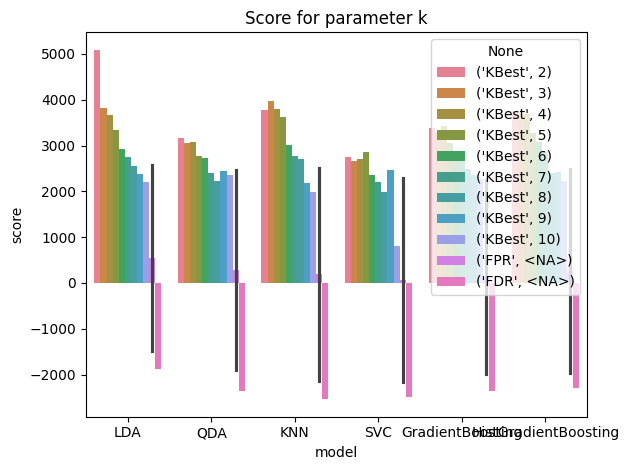

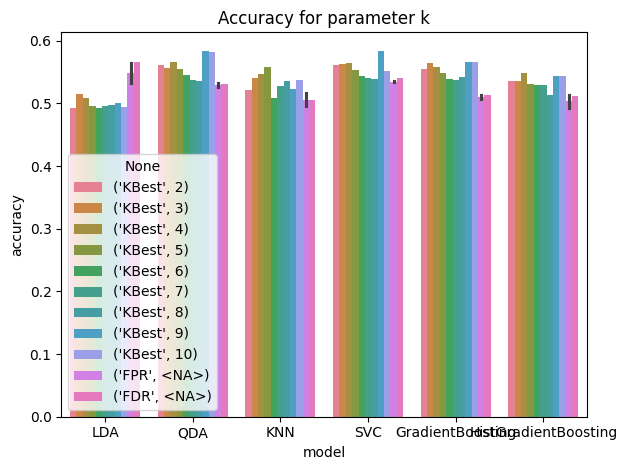

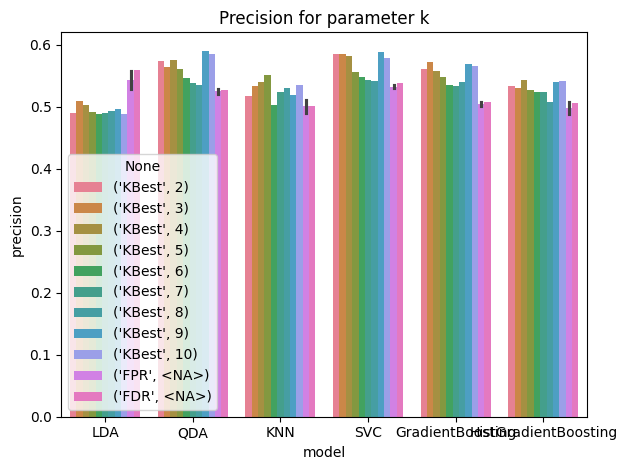

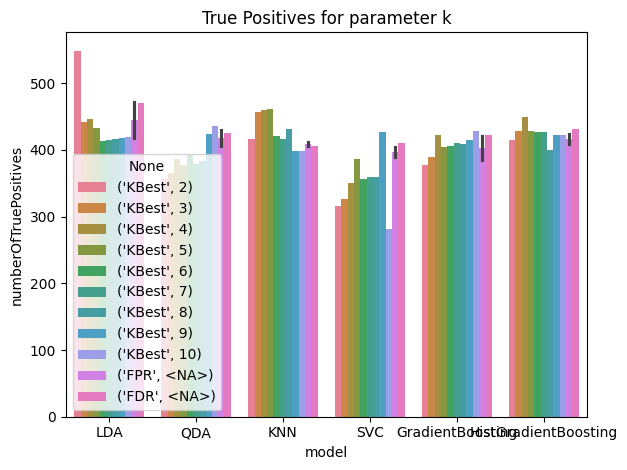

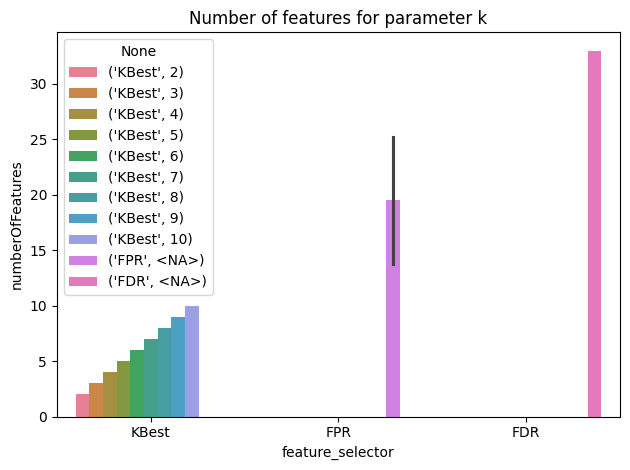

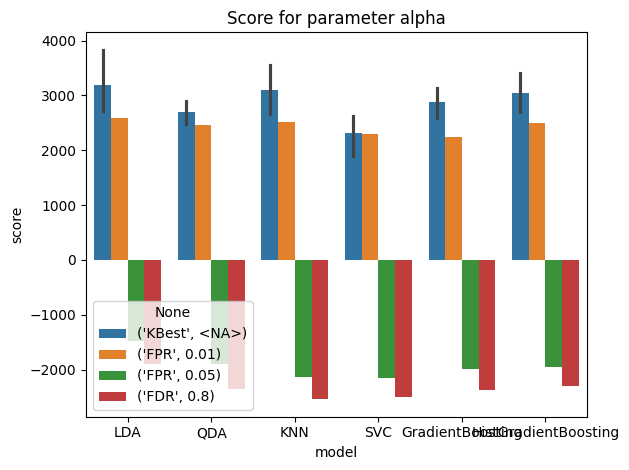

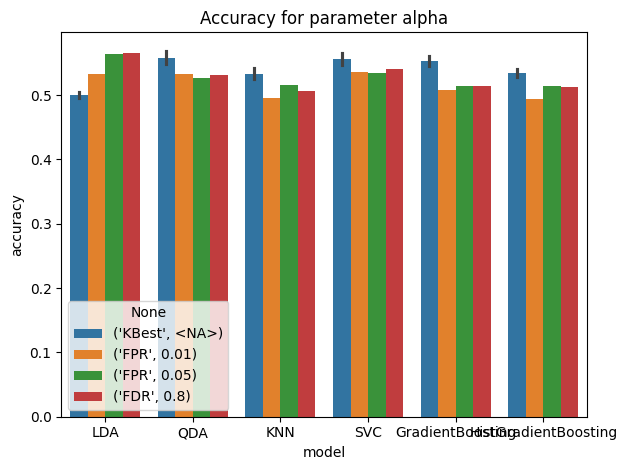

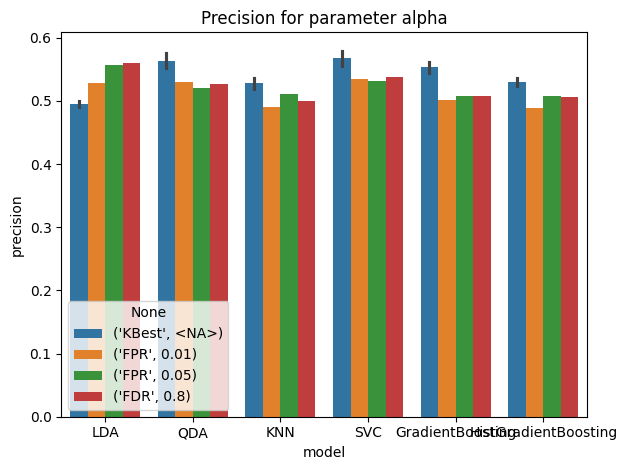

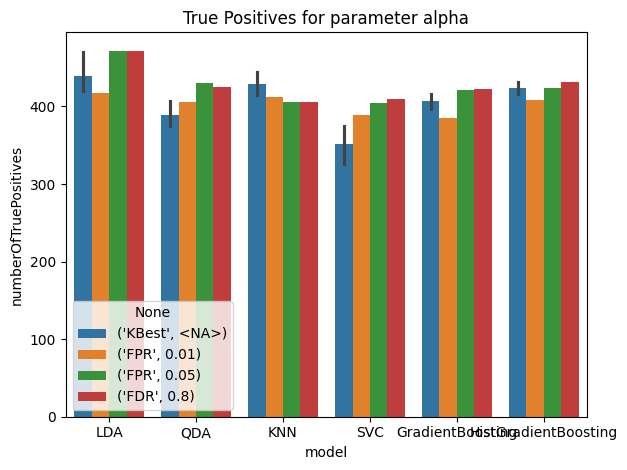

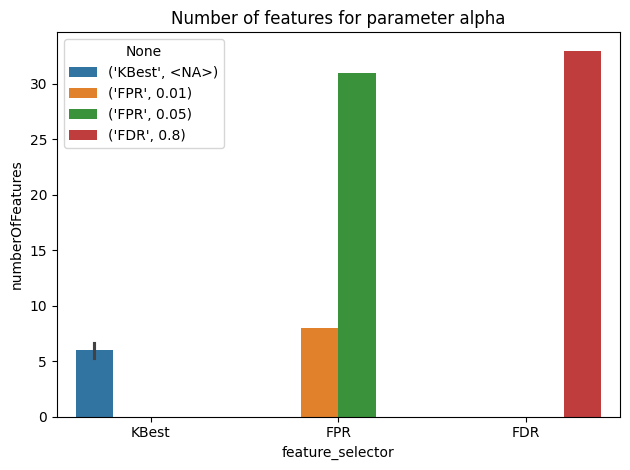

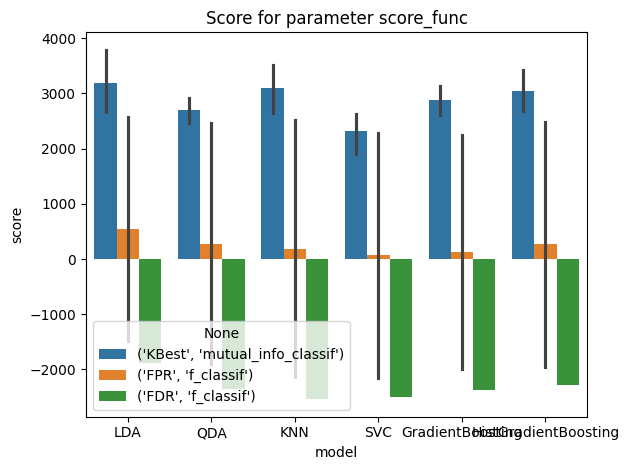

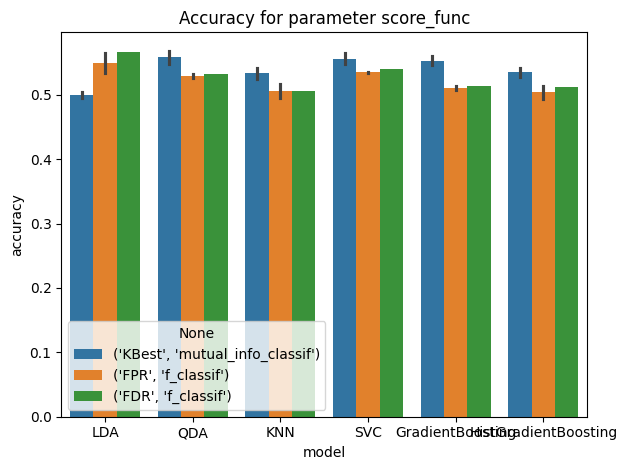

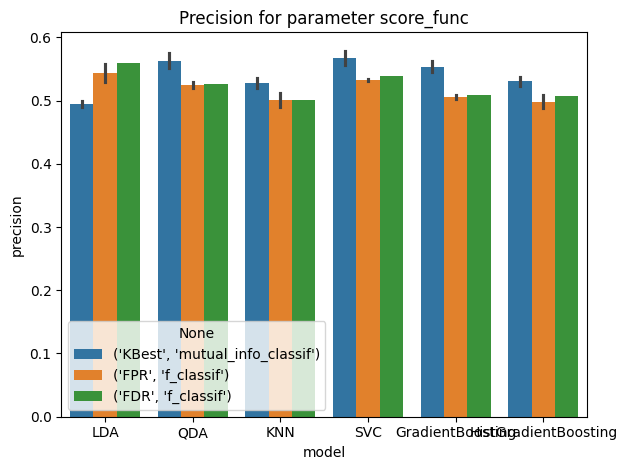

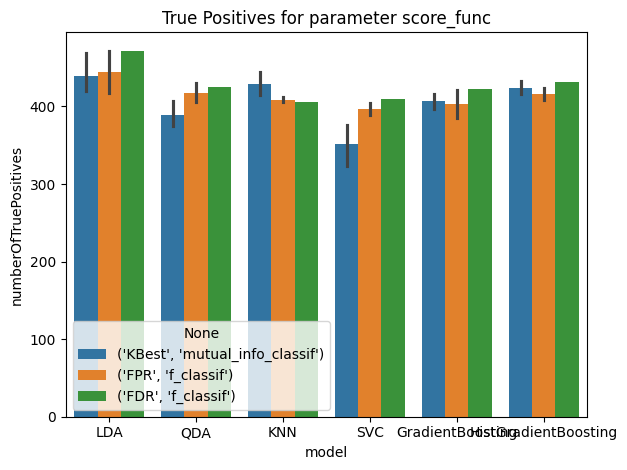

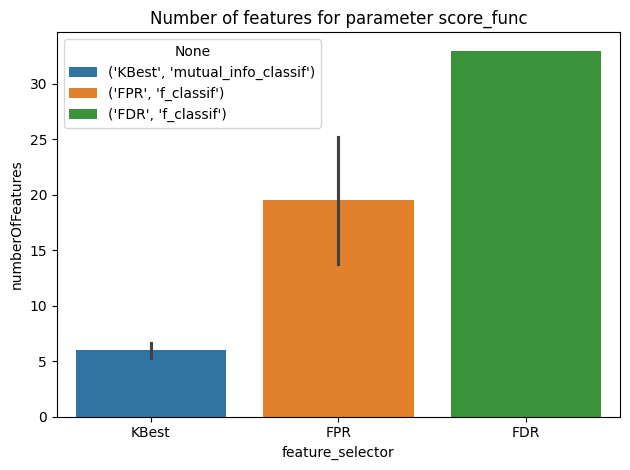

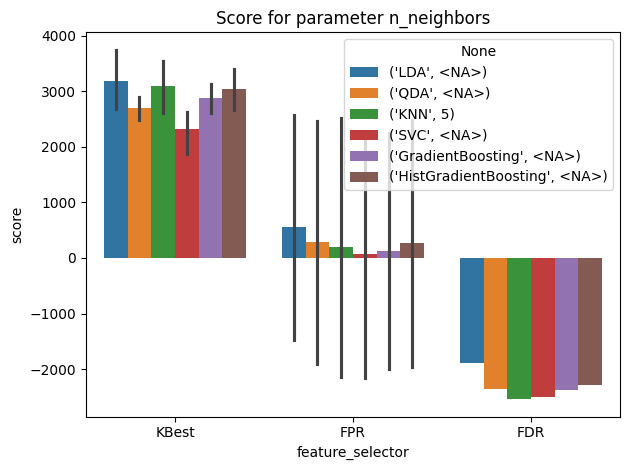

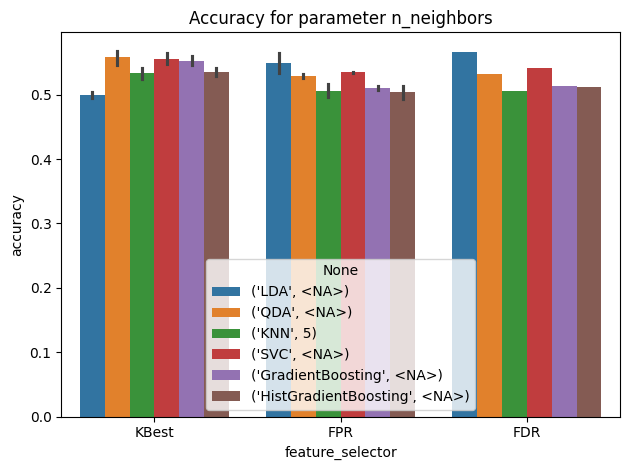

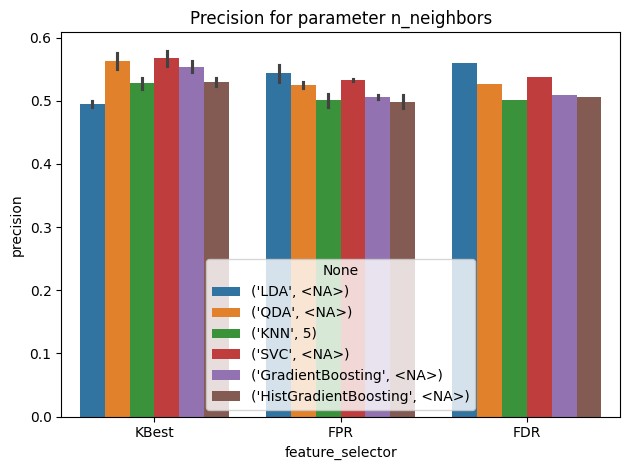

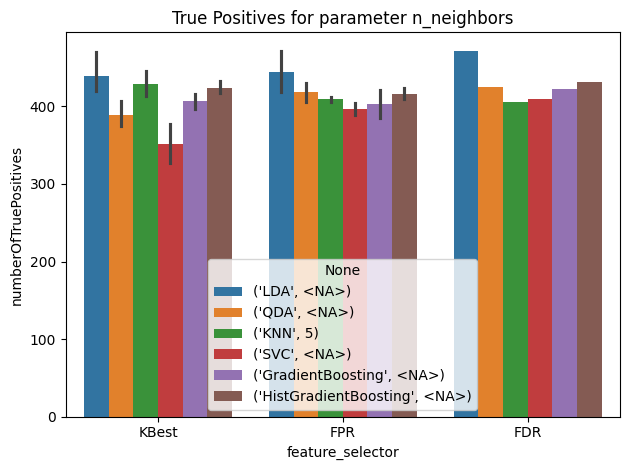

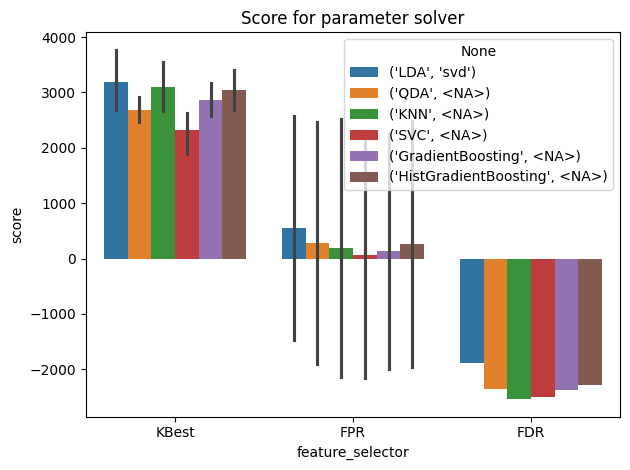

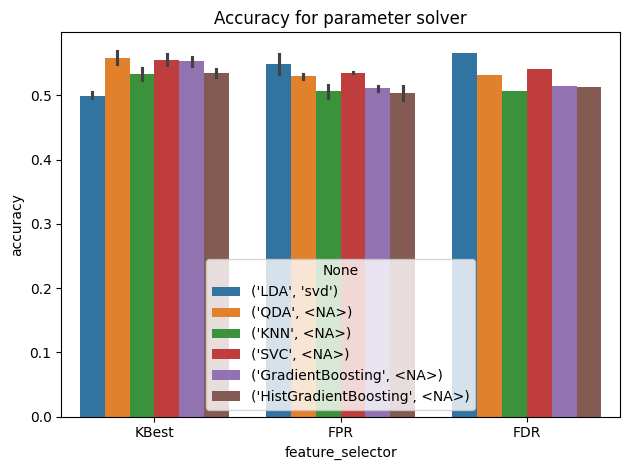

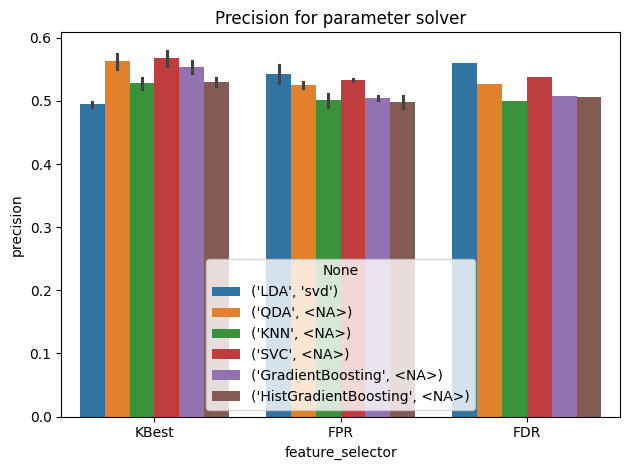

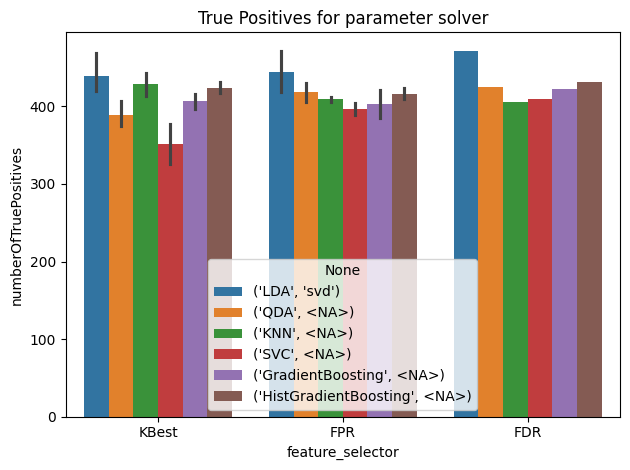

CPU times: total: 8.64 s
Wall time: 14.6 s


In [ ]:
%%time
processedResultsDf, parameters = functions.extractParameterResults(
    resultsDf, models, featureSelectors
)
functions.drawParameterResultsBarplot(processedResultsDf, parameters)

### Score/Accuracy by number of features

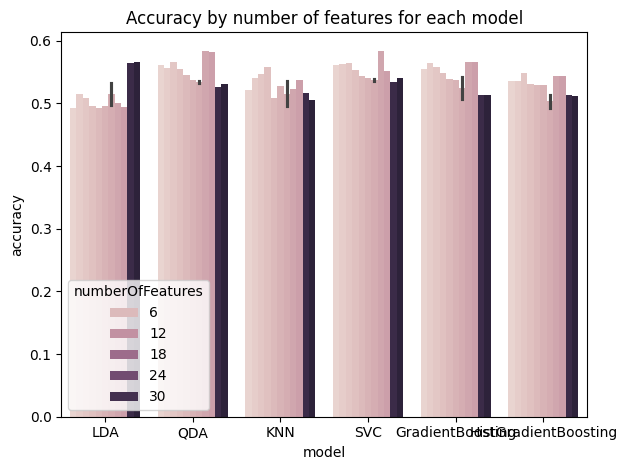

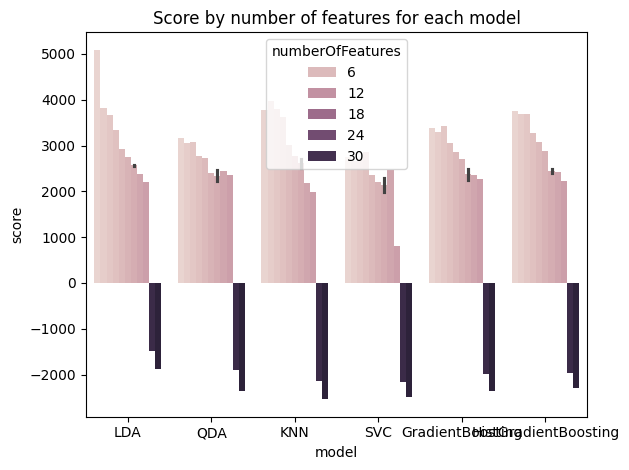

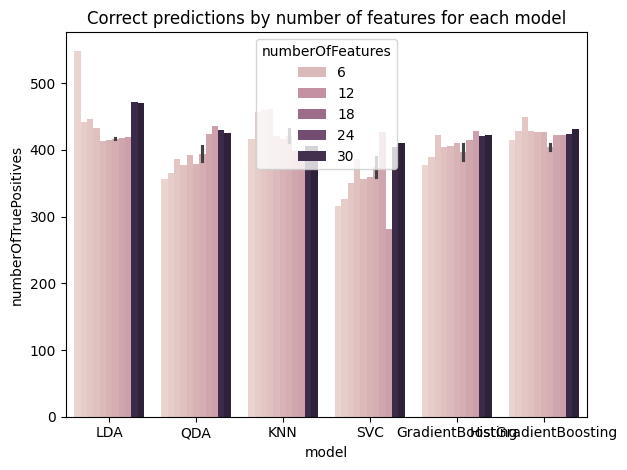

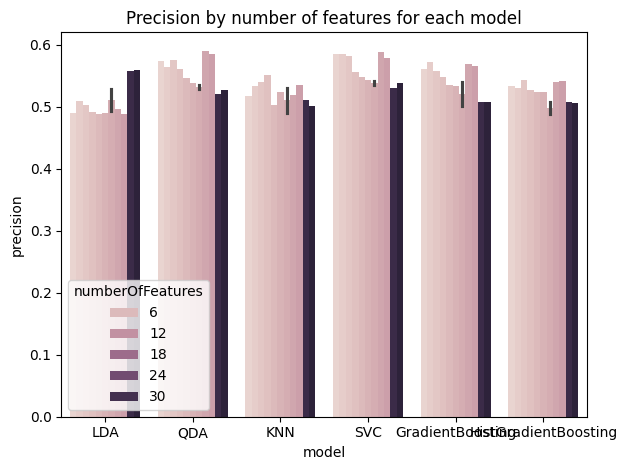

In [ ]:
functions.drawResultsPerNumberOfFeatures(processedResultsDf)

### Final Results for Feature Selectors

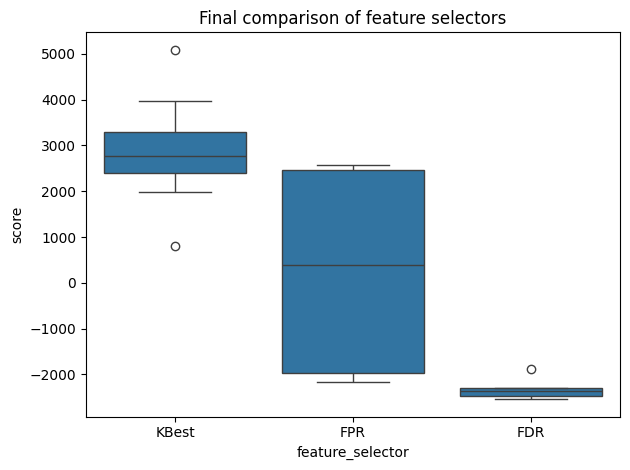

In [ ]:
plt.title("Final comparison of feature selectors")
sns.boxplot(data=processedResultsDf, x="feature_selector", y="score")

plt.tight_layout()
plt.show()

### Final Results for Models

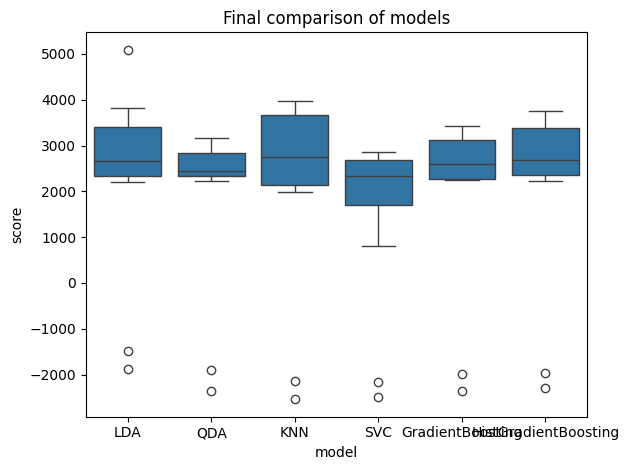

In [ ]:
plt.title("Final comparison of models")
sns.boxplot(data=processedResultsDf, x="model", y="score")
plt.tight_layout()
plt.show()

### Final Results

In [ ]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 961 µs


In [ ]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures model  \
0   5090                    549  0.492727   0.490617                 2   LDA   

    model_parameters feature_selector  \
0  {'solver': 'svd'}            KBest   

                                 selector_parameters selector_parameters_k  \
0  {'score_func': <function mutual_info_classif a...                     2   

  selector_parameters_alpha selector_parameters_score_func  \
0                      <NA>            mutual_info_classif   

  model_parameters_n_neighbors model_parameters_solver  
0                         <NA>                     svd

# Batch 4

## Consts

In [ ]:
RESULTS_FILENAME = "./Results/Limited/results-4"

## Experiment

### Parameters

In [ ]:
# LDA
solver = ["svd"]
ldaParameters = functions.generateParameters([solver], globals())

# QDA
qdaParameters = [{}]

# KNN
n_neighbors = [5]
knnParameters = functions.generateParameters([n_neighbors], globals())

# SVC
svcParameters = [{}]

# HistGradientBoosting
histGradientBoostingParameters = [{}]


# GradientBoosting
gradientBoostingParameters = [{}]

# MLPClassifier
mlpClassifierParameters = [{}]

# Voting?


models = [
    {"model": functions.ModelType.LDA, "parameters": ldaParameters},
    {"model": functions.ModelType.QDA, "parameters": qdaParameters},
    {"model": functions.ModelType.KNN, "parameters": knnParameters},
    {"model": functions.ModelType.SVC, "parameters": svcParameters},
    {
        "model": functions.ModelType.GradientBoosting,
        "parameters": gradientBoostingParameters,
    },
    {
        "model": functions.ModelType.HistGradientBoosting,
        "parameters": histGradientBoostingParameters,
    },
    {"model": functions.ModelType.MLPClassifier, "parameters": mlpClassifierParameters},
]

In [ ]:
# KBest
k = [2, 3, 4]
score_func = [mutual_info_classif]
kBestParameters = functions.generateParameters([score_func, k], globals())

# FPR

# mutual_info_classif seems to break for FPR but maybe try to run these without StandardScaler?
score_func = [f_classif]
alpha = [0.01, 0.05]
fprParameters = functions.generateParameters([score_func, alpha], globals())

# FDR
score_func = [f_classif]
alpha = [0.8]
fdrParameters = functions.generateParameters([score_func, alpha], globals())

# FWE
score_func = [f_classif]
alpha = [0.8]
fweParameters = functions.generateParameters([score_func, alpha], globals())


featureSelectors = [
    {"model": functions.FeatureSelectorType.KBest, "parameters": kBestParameters},
    {"model": functions.FeatureSelectorType.FPR, "parameters": fprParameters},
    {"model": functions.FeatureSelectorType.FDR, "parameters": fdrParameters},
    {"model": functions.FeatureSelectorType.FWE, "parameters": fweParameters},
]

### Conducting the experiment

In [ ]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [ ]:
%%time
results = functions.conductExperiments(
    models=models,
    featureSelectors=featureSelectors,
    X_orig=X_train,
    y_orig=y_train_ravel,
    getLimitedScore=True,
)
with open(RESULTS_FILENAME, "wb") as f:
    pickle.dump(results, f)

Performed Experiment 1/42(approx) took (s): model: 0.0 selector 12.07 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.LDA {'solver': 'svd'}
Performed Experiment 2/42(approx) took (s): model: 0.0 selector 12.07 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.QDA {}
Performed Experiment 3/42(approx) took (s): model: 0.06 selector 12.07 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.KNN {'n_neighbors': 5}
Performed Experiment 4/42(approx) took (s): model: 0.66 selector 12.07 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.SVC {}
Performed Experiment 5/42(approx) took (s): model: 0.46 selector 12.07 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} Mod

## Results

In [ ]:
with open(RESULTS_FILENAME, "rb") as input_file:
    results = pickle.load(input_file)

In [ ]:
resultsDf = pd.DataFrame(
    results,
    columns=functions.RESULTS_COLUMNS,
)

### Detailed Results

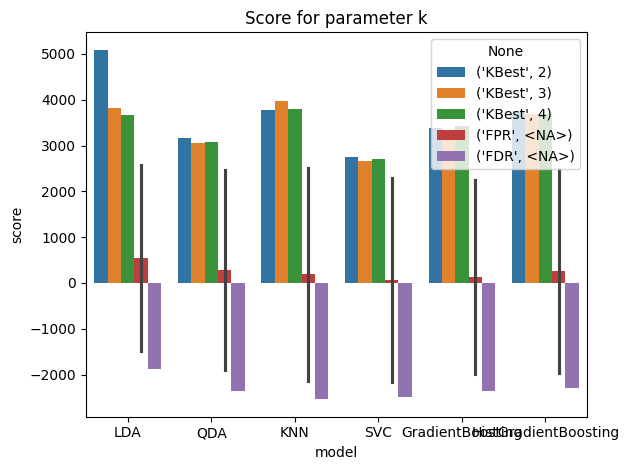

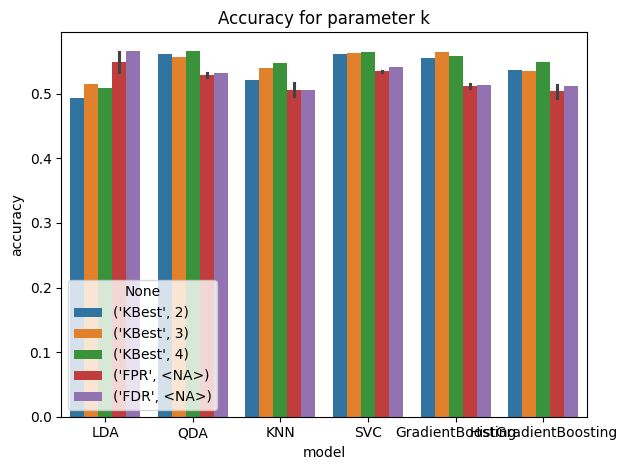

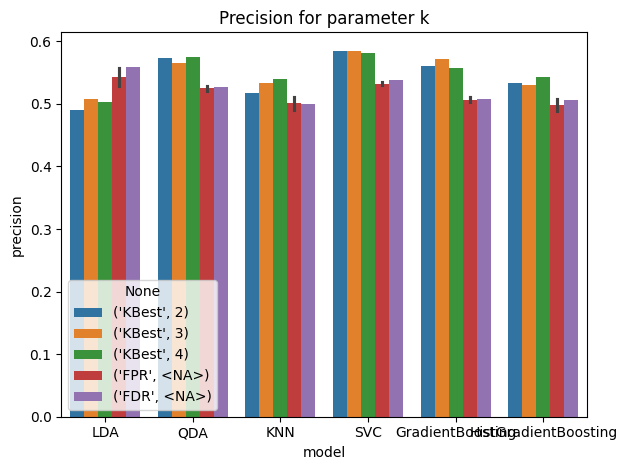

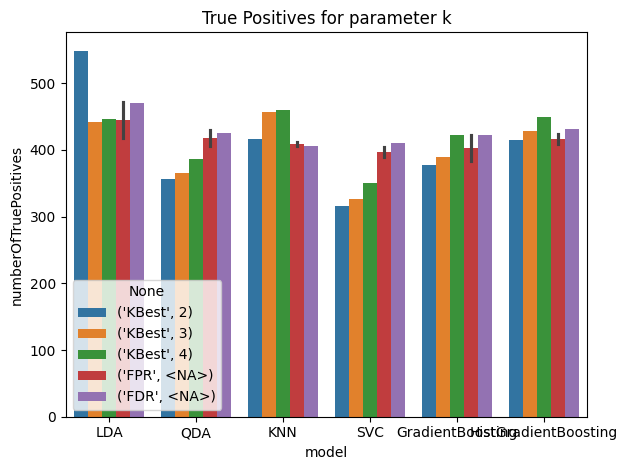

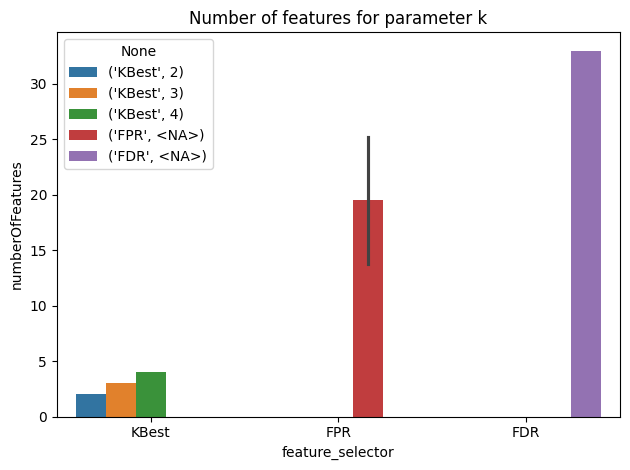

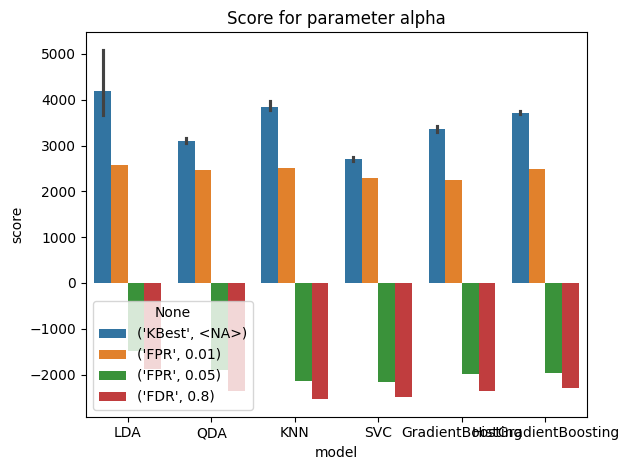

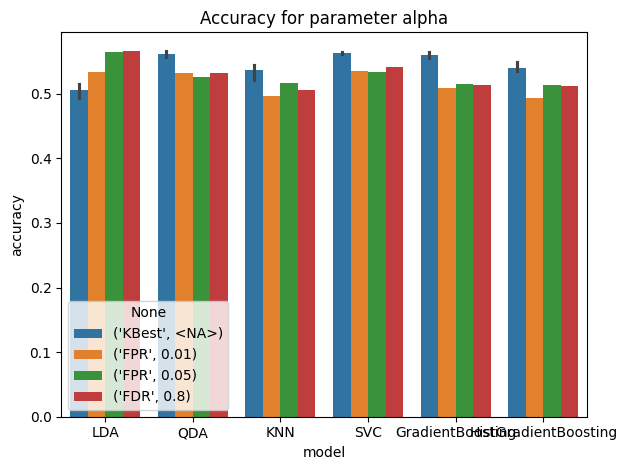

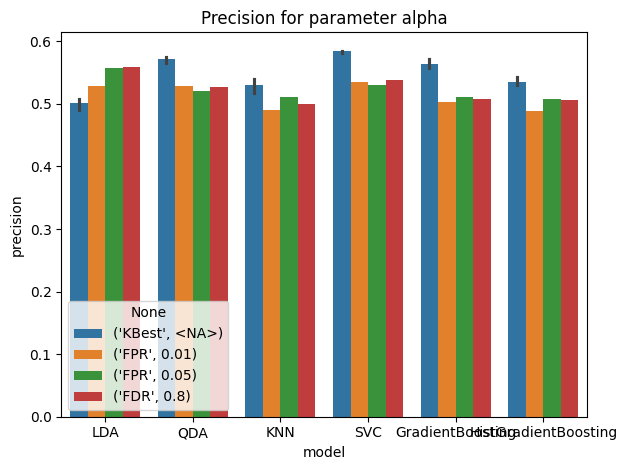

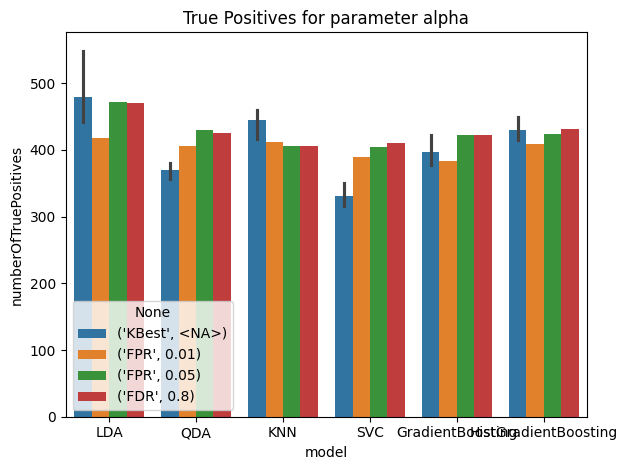

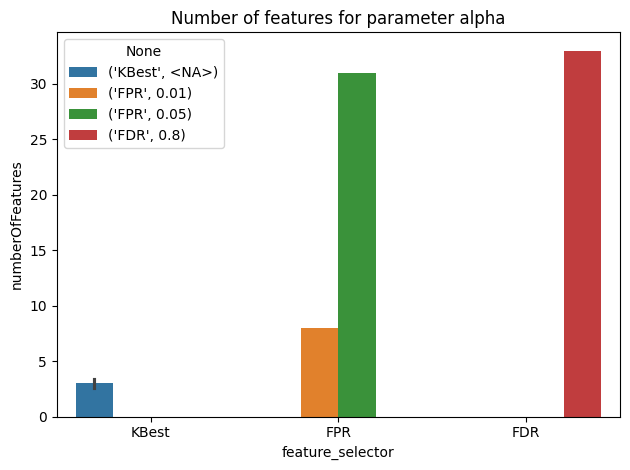

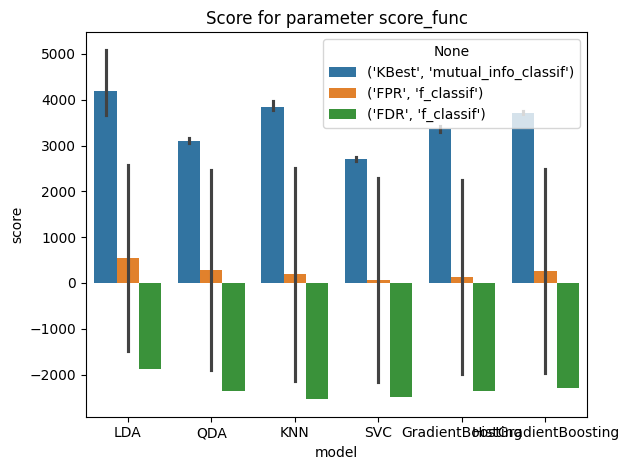

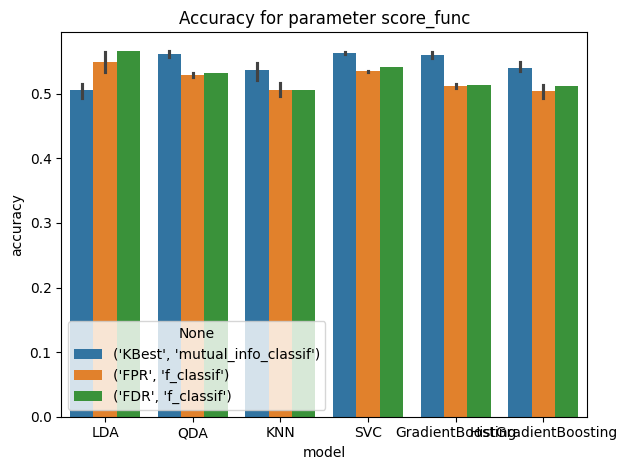

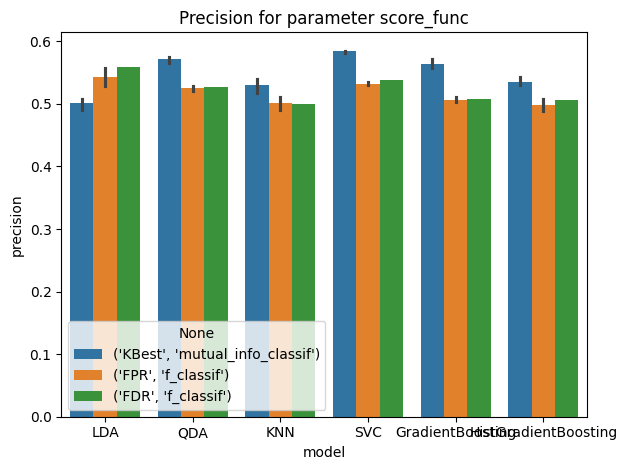

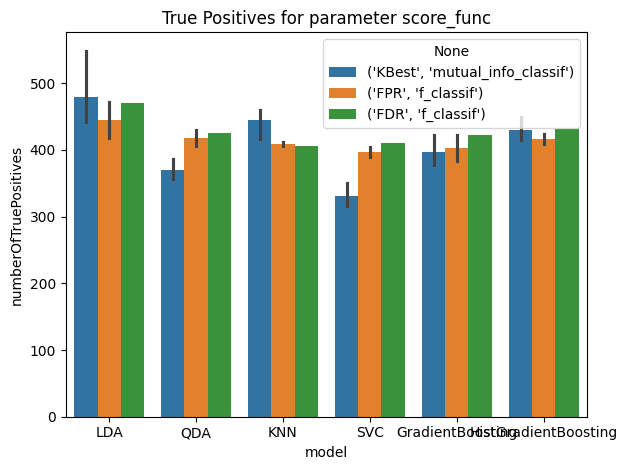

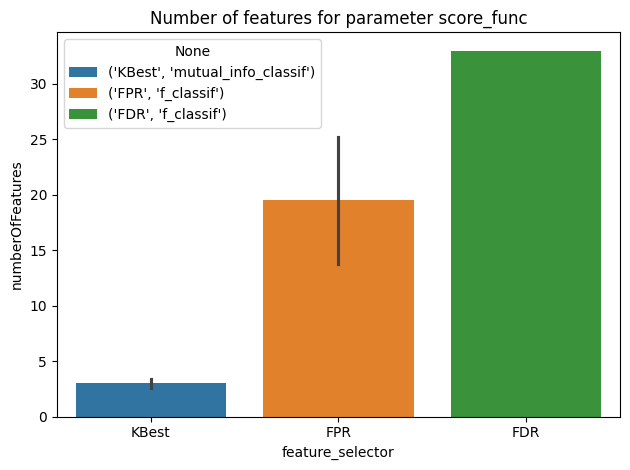

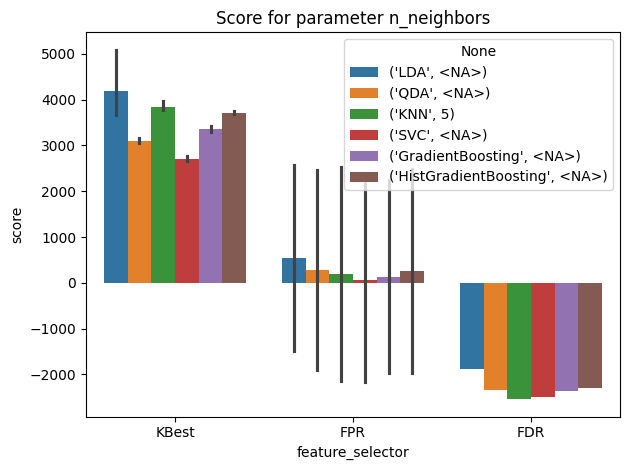

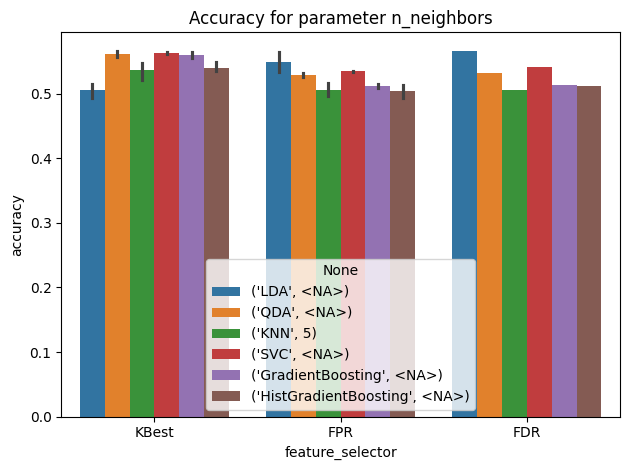

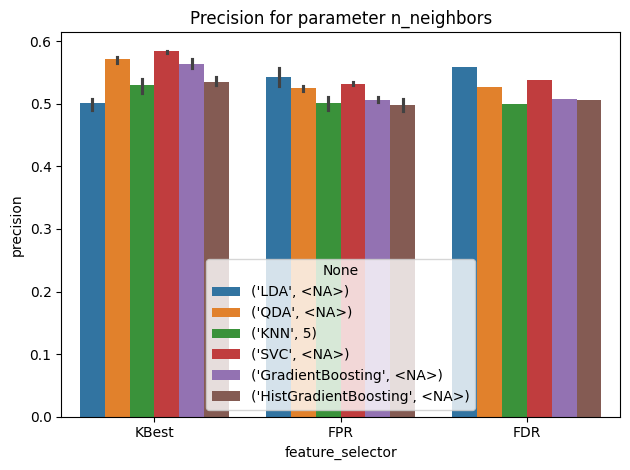

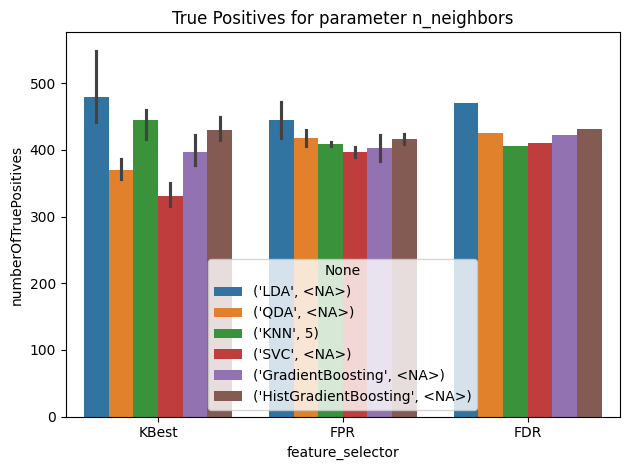

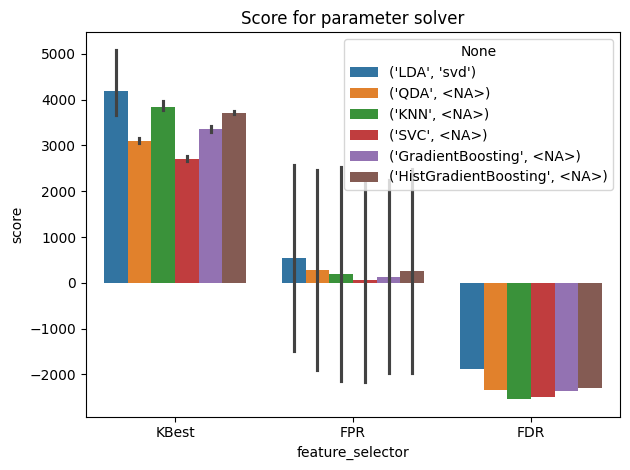

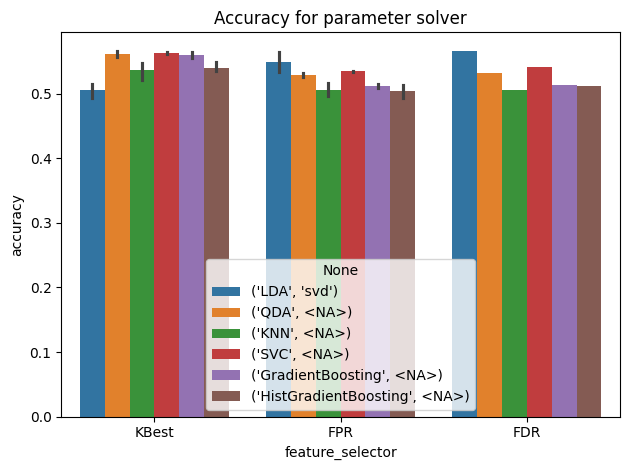

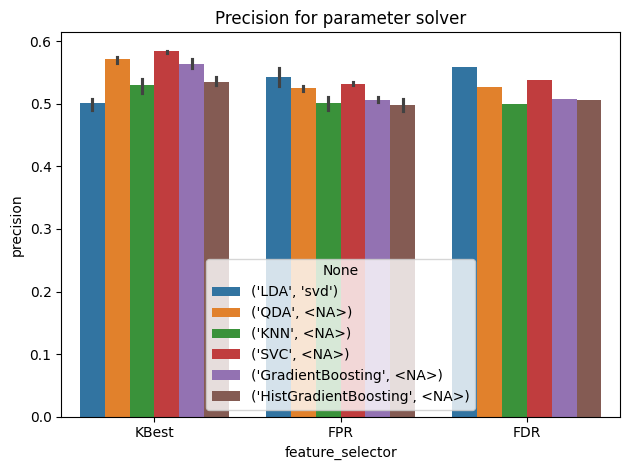

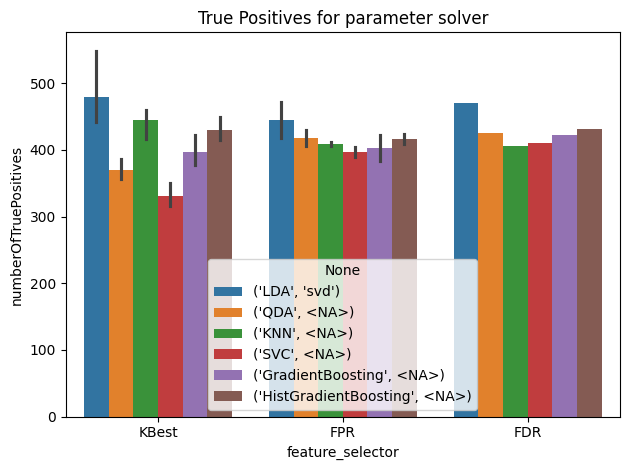

CPU times: total: 7.44 s
Wall time: 13.4 s


In [ ]:
%%time
processedResultsDf, parameters = functions.extractParameterResults(
    resultsDf, models, featureSelectors
)
functions.drawParameterResultsBarplot(processedResultsDf, parameters)

### Score/Accuracy by number of features

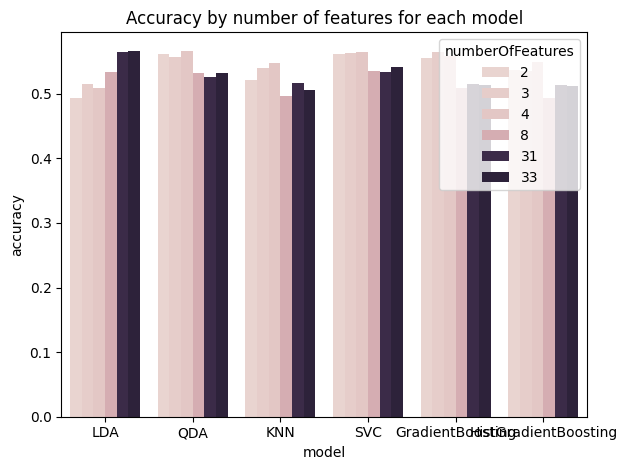

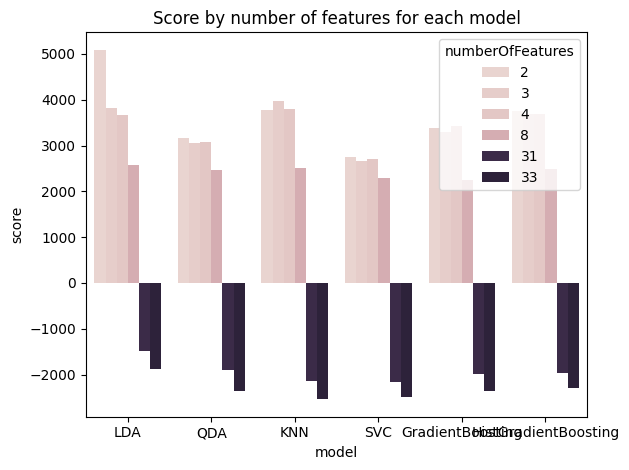

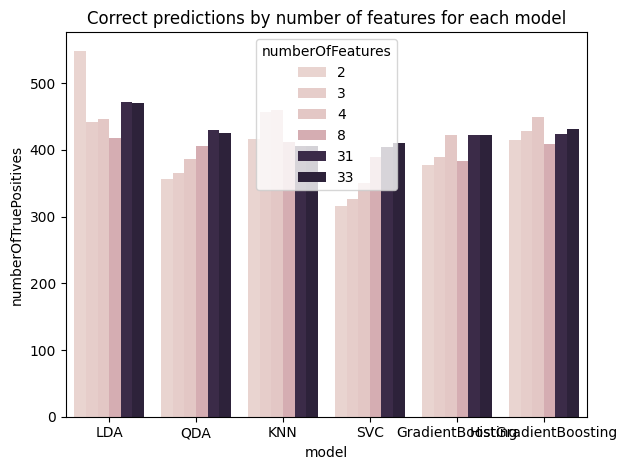

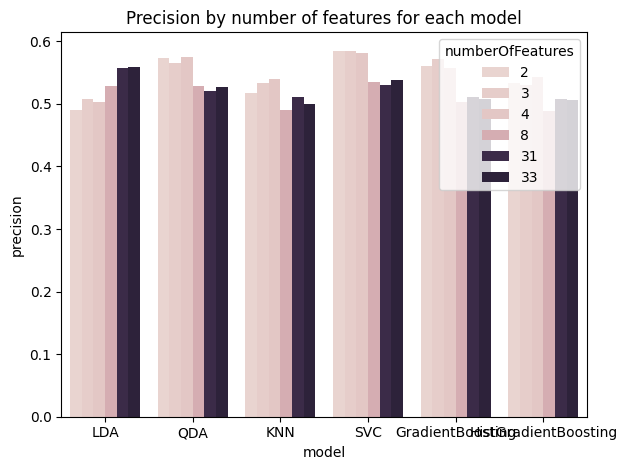

In [ ]:
functions.drawResultsPerNumberOfFeatures(processedResultsDf)

### Final Results for Feature Selectors

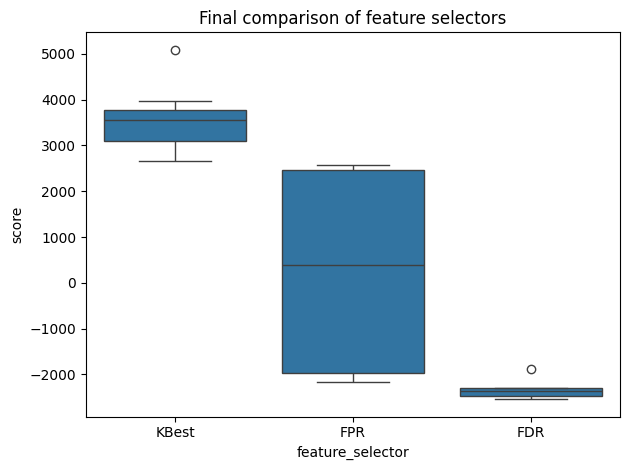

In [ ]:
plt.title("Final comparison of feature selectors")
sns.boxplot(data=processedResultsDf, x="feature_selector", y="score")

plt.tight_layout()
plt.show()

### Final Results for Models

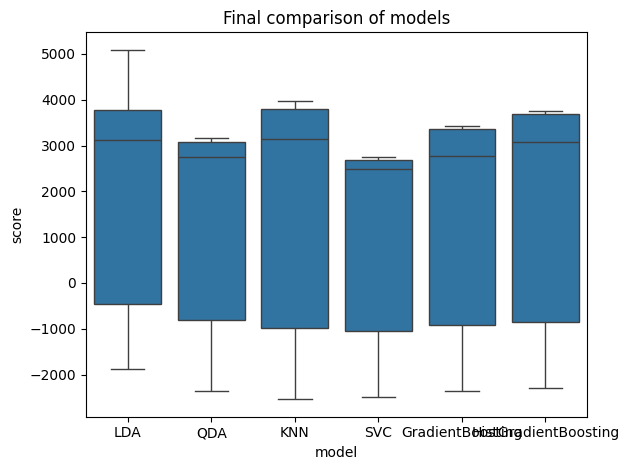

In [ ]:
plt.title("Final comparison of models")
sns.boxplot(data=processedResultsDf, x="model", y="score")
plt.tight_layout()
plt.show()

### Final Results

In [ ]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 2 ms


In [ ]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures model  \
0   5090                    549  0.492727   0.490617                 2   LDA   

    model_parameters feature_selector  \
0  {'solver': 'svd'}            KBest   

                                 selector_parameters selector_parameters_k  \
0  {'score_func': <function mutual_info_classif a...                     2   

  selector_parameters_alpha selector_parameters_score_func  \
0                      <NA>            mutual_info_classif   

  model_parameters_n_neighbors model_parameters_solver  
0                         <NA>                     svd

# Batch 5

## Consts

In [ ]:
RESULTS_FILENAME = "./Results/Limited/results-5"

## Experiment

### Parameters

In [ ]:
# LDA
solver = ["svd"]
ldaParameters = functions.generateParameters([solver], globals())

# QDA
qdaParameters = [{}]

# KNN
n_neighbors = [5]
knnParameters = functions.generateParameters([n_neighbors], globals())

# SVC
svcParameters = [{}]

# HistGradientBoosting
histGradientBoostingParameters = [{}]


# GradientBoosting
gradientBoostingParameters = [{}]

# MLPClassifier
mlpClassifierParameters = [{}]

# Voting?


models = [
    {"model": functions.ModelType.LDA, "parameters": ldaParameters},
    {"model": functions.ModelType.QDA, "parameters": qdaParameters},
    {"model": functions.ModelType.KNN, "parameters": knnParameters},
    {"model": functions.ModelType.SVC, "parameters": svcParameters},
    {
        "model": functions.ModelType.GradientBoosting,
        "parameters": gradientBoostingParameters,
    },
    {
        "model": functions.ModelType.HistGradientBoosting,
        "parameters": histGradientBoostingParameters,
    },
    {"model": functions.ModelType.MLPClassifier, "parameters": mlpClassifierParameters},
]

In [ ]:
# KBest
k = [2, 3, 4]
score_func = [mutual_info_classif]
kBestParameters = functions.generateParameters([score_func, k], globals())

# FPR

# mutual_info_classif seems to break for FPR but maybe try to run these without StandardScaler?
score_func = [f_classif]
alpha = [0.01, 0.05]
fprParameters = functions.generateParameters([score_func, alpha], globals())


# RFE
estimator = [SVC(kernel="linear")]
n_features_to_select = [5, 10, 20]
step = [0.9]
rfeParameters = functions.generateParameters(
    [estimator, n_features_to_select, step], globals()
)

# RFECV
estimator = [SVC(kernel="linear")]
min_features_to_select = [5, 10, 20]
step = [0.9]
cv = [5]

rfeCvParameters = functions.generateParameters(
    [estimator, min_features_to_select, step, cv], globals()
)


featureSelectors = [
    {"model": functions.FeatureSelectorType.KBest, "parameters": kBestParameters},
    {"model": functions.FeatureSelectorType.FPR, "parameters": fprParameters},
    {"model": functions.FeatureSelectorType.RFE, "parameters": rfeParameters},
    {"model": functions.FeatureSelectorType.RFECV, "parameters": rfeCvParameters},
]

### Conducting the experiment

In [ ]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [ ]:
%%time
results = functions.conductExperiments(
    models=models,
    featureSelectors=featureSelectors,
    X_orig=X_train,
    y_orig=y_train_ravel,
    getLimitedScore=True,
)
with open(RESULTS_FILENAME, "wb") as f:
    pickle.dump(results, f)

Performed Experiment 1/66(approx) took (s): model: 0.01 selector 11.87 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.LDA {'solver': 'svd'}
Performed Experiment 2/66(approx) took (s): model: 0.0 selector 11.87 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.QDA {}
Performed Experiment 3/66(approx) took (s): model: 0.06 selector 11.87 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.KNN {'n_neighbors': 5}
Performed Experiment 4/66(approx) took (s): model: 0.81 selector 11.87 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} ModelType.SVC {}
Performed Experiment 5/66(approx) took (s): model: 0.46 selector 11.87 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000231A354CCC0>, 'k': 2} Mo

## Results

In [ ]:
with open(RESULTS_FILENAME, "rb") as input_file:
    results = pickle.load(input_file)

In [ ]:
resultsDf = pd.DataFrame(
    results,
    columns=functions.RESULTS_COLUMNS,
)

### Detailed Results

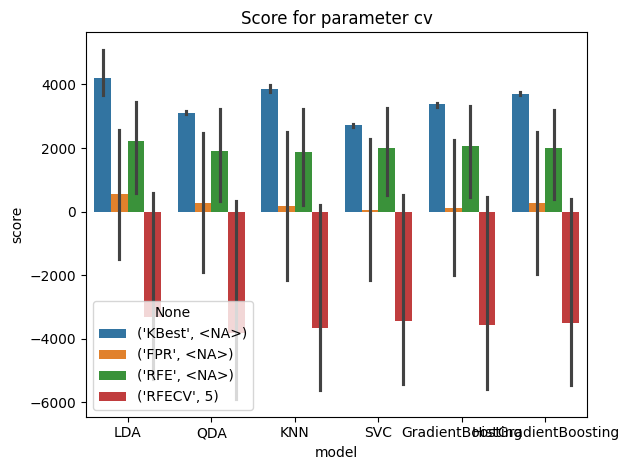

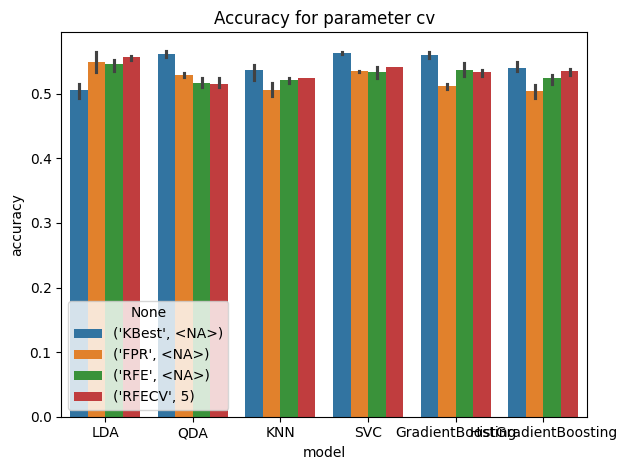

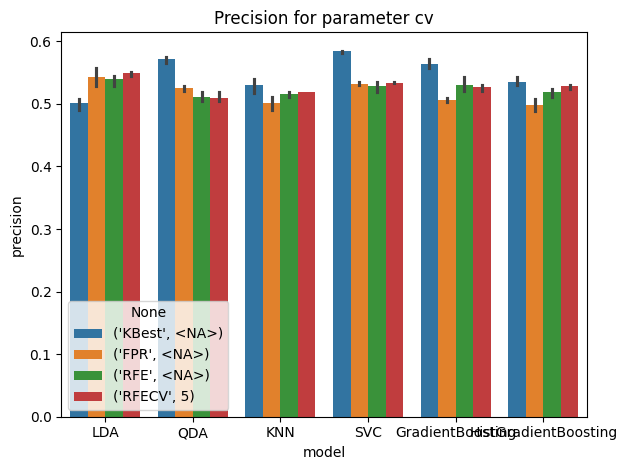

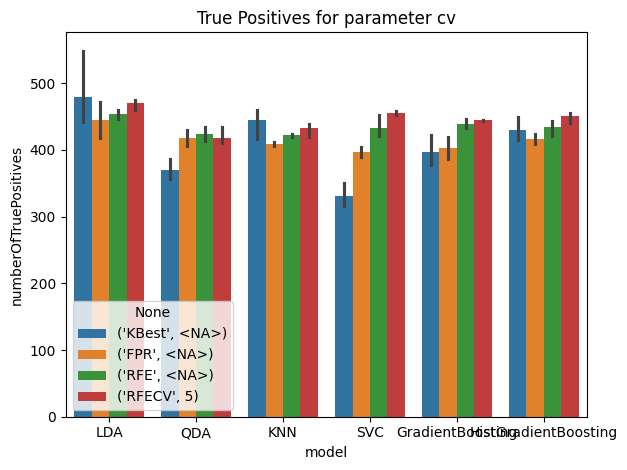

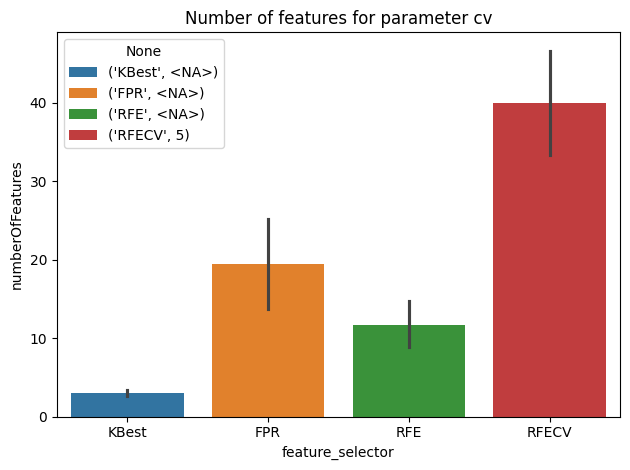

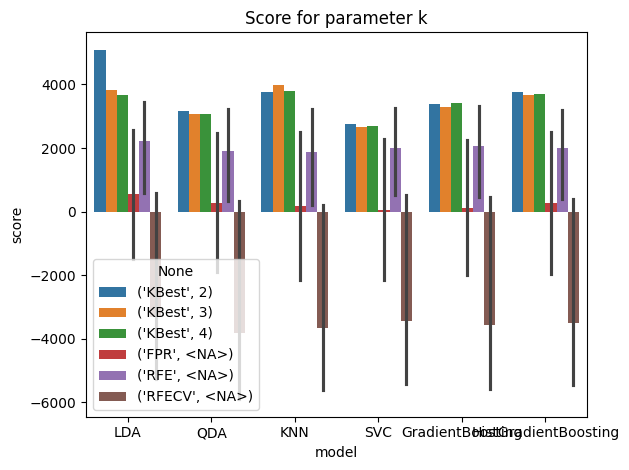

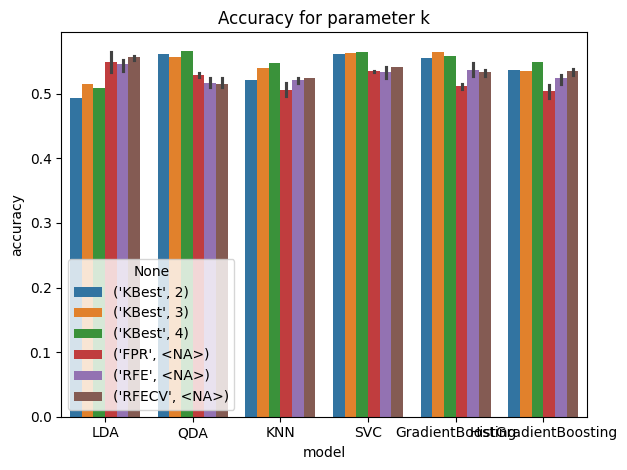

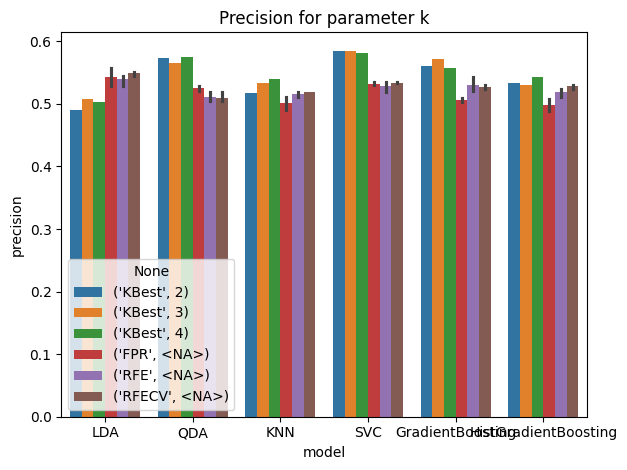

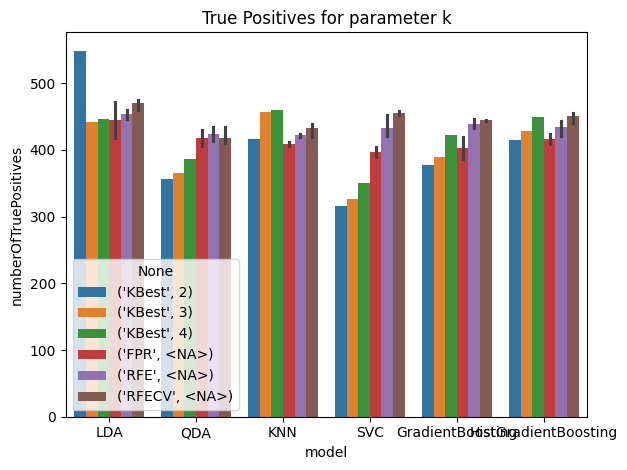

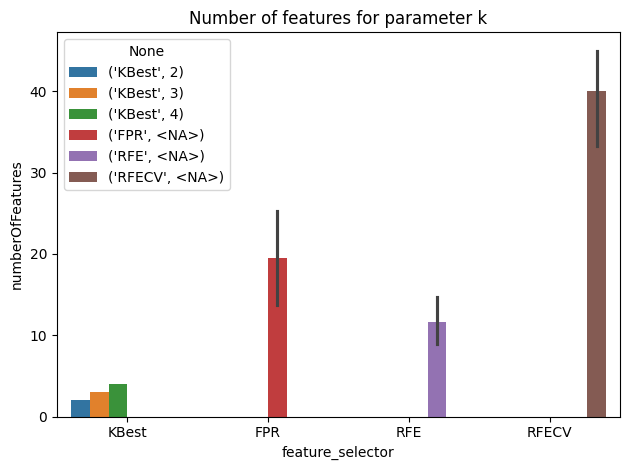

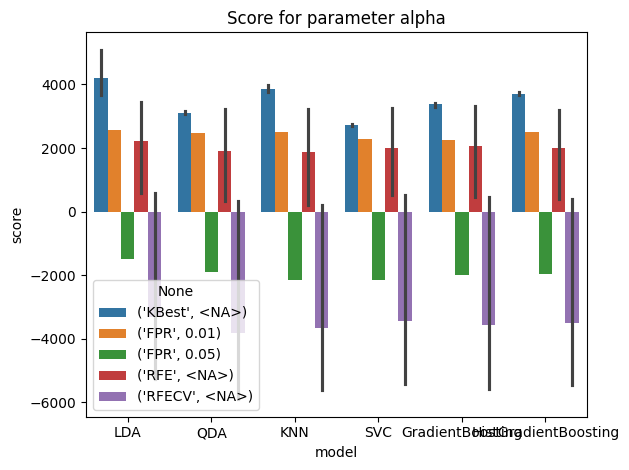

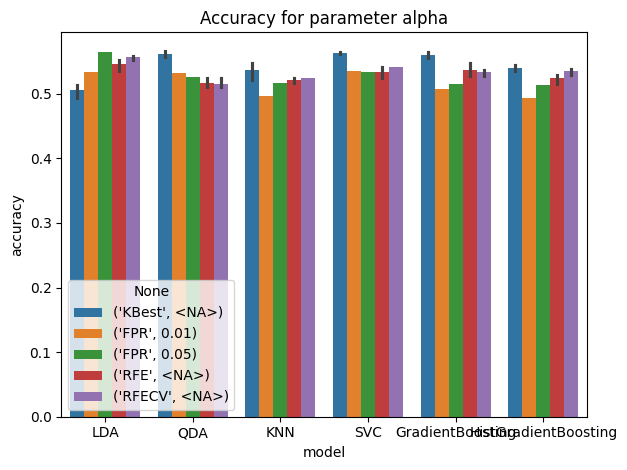

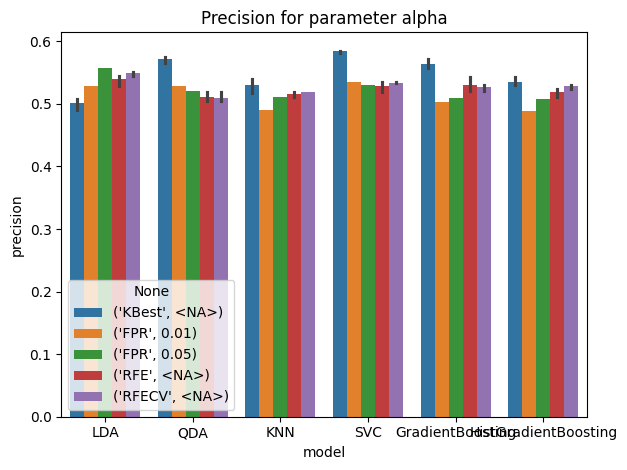

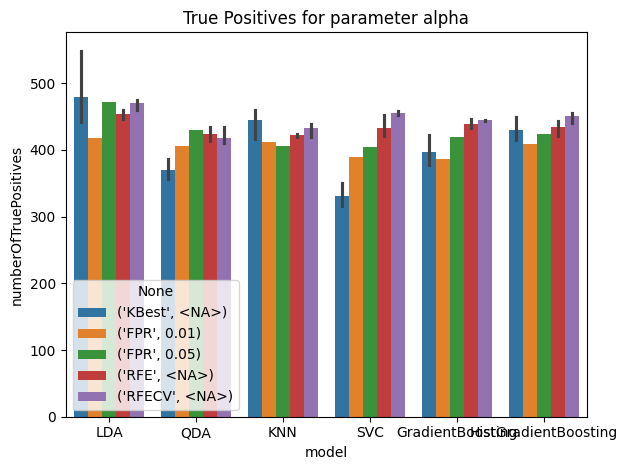

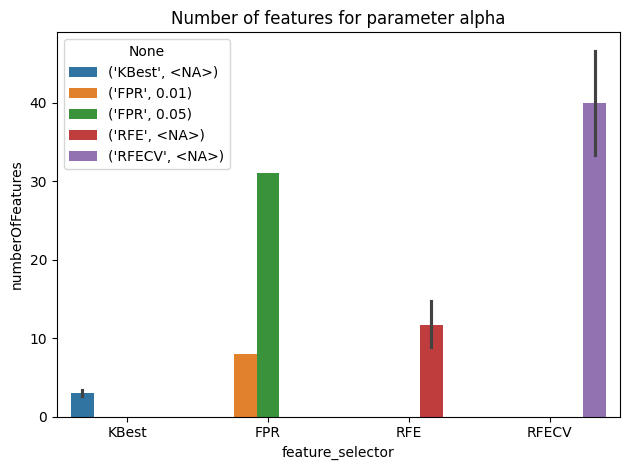

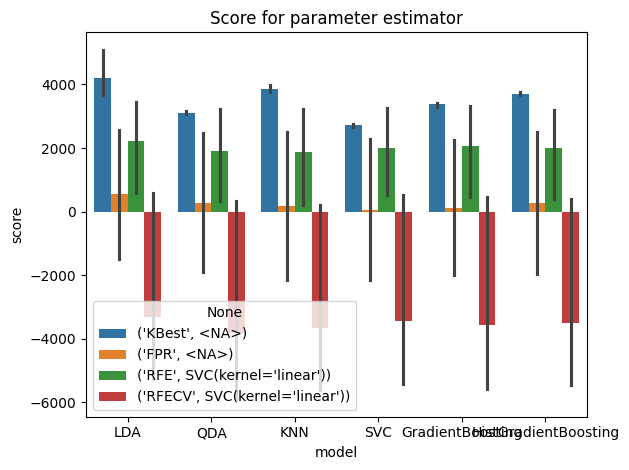

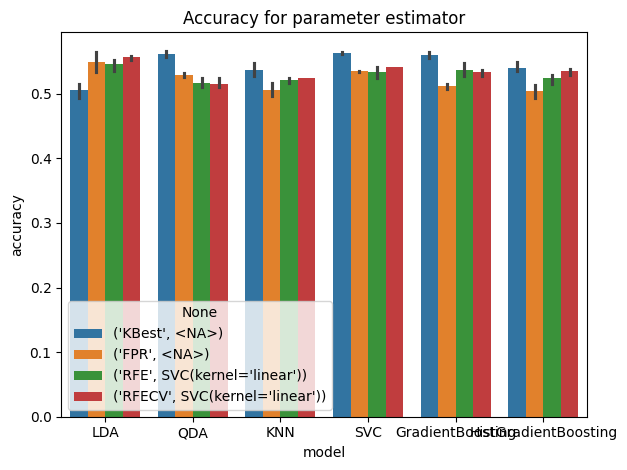

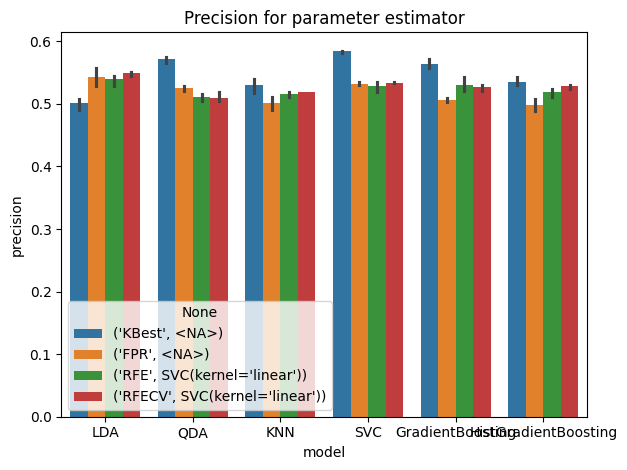

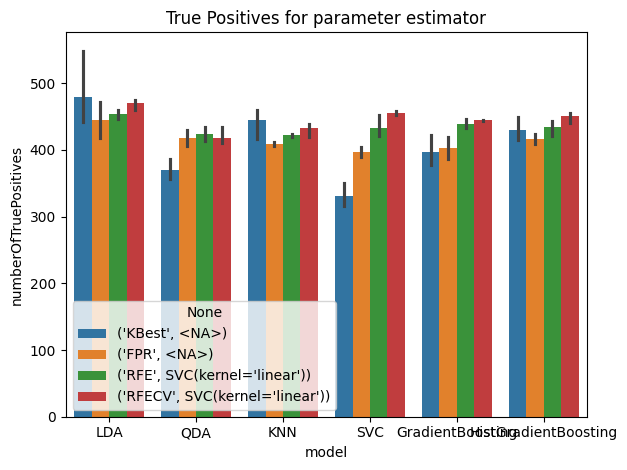

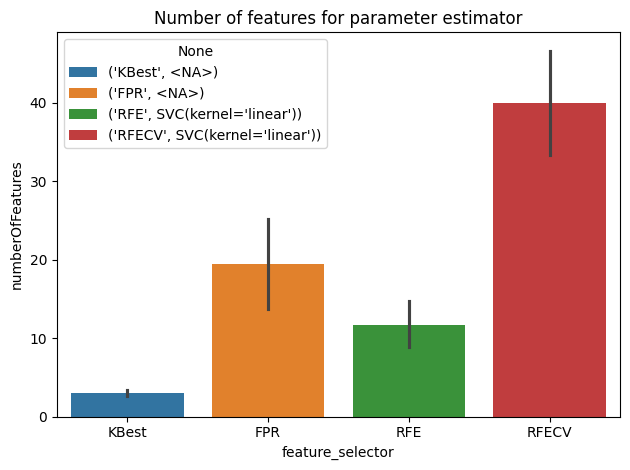

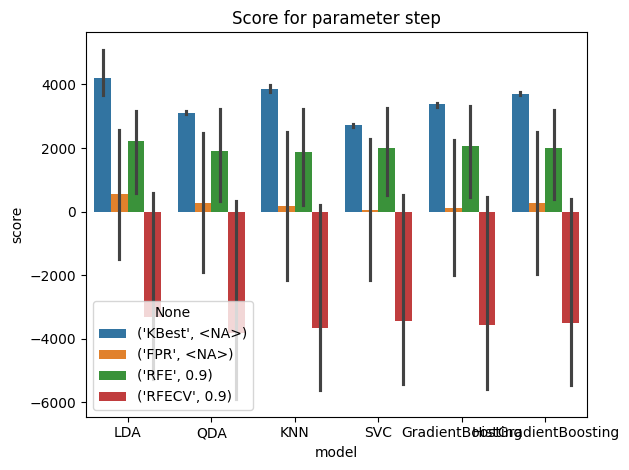

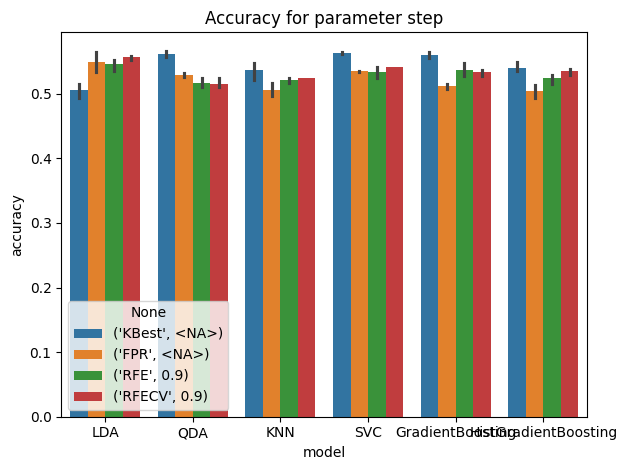

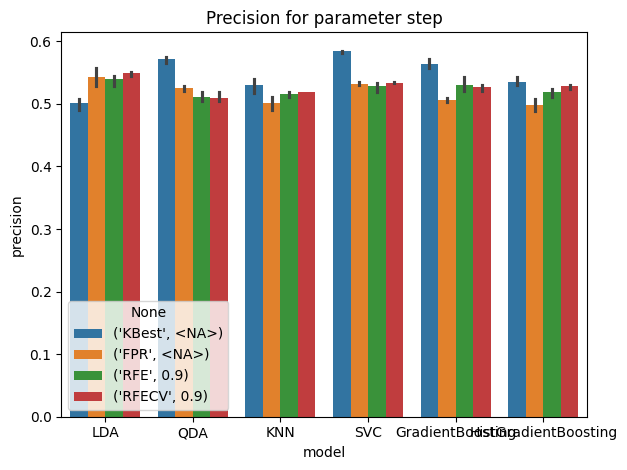

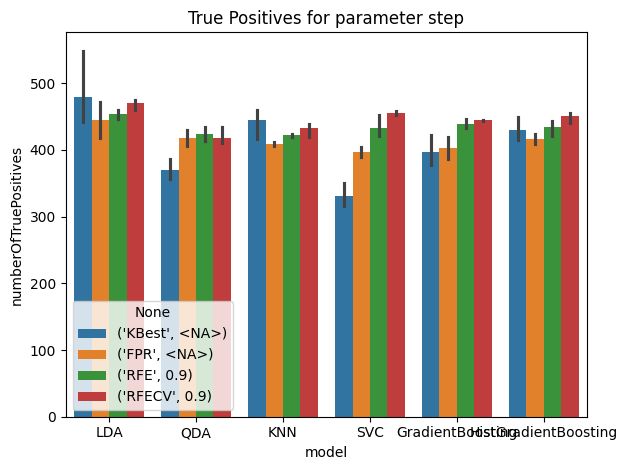

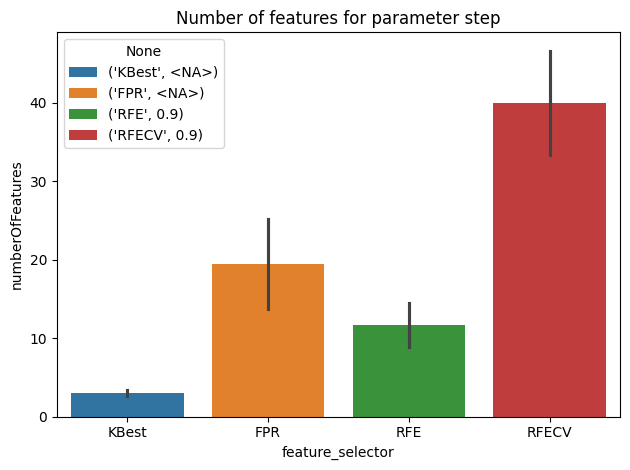

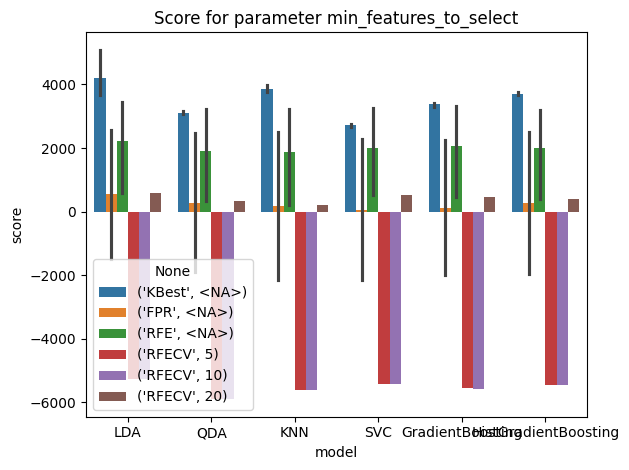

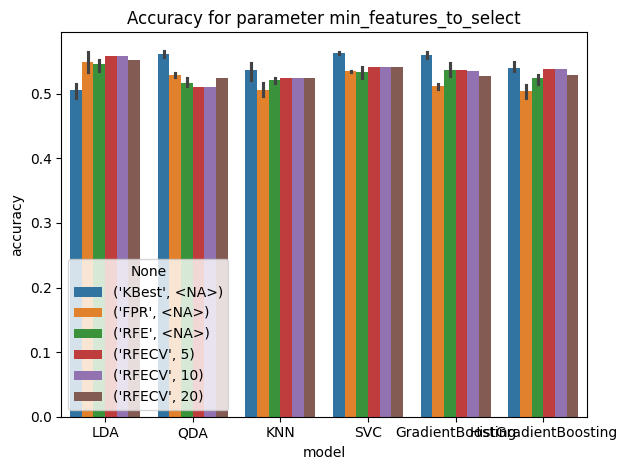

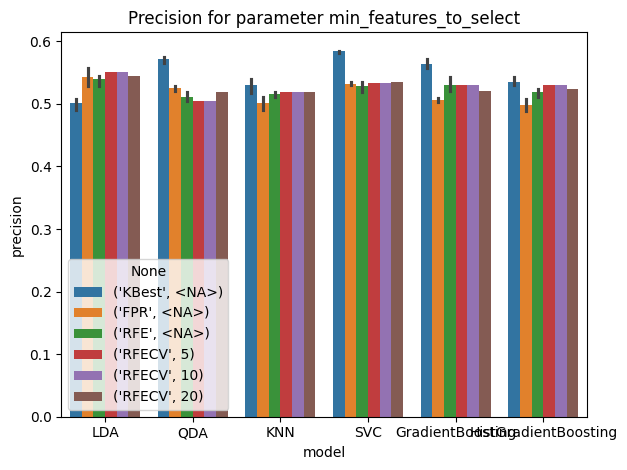

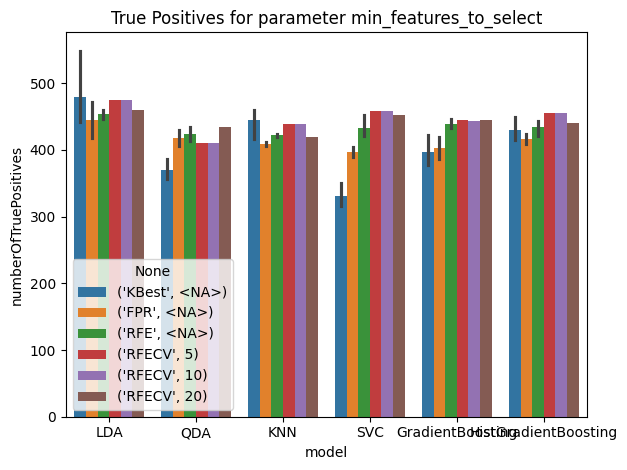

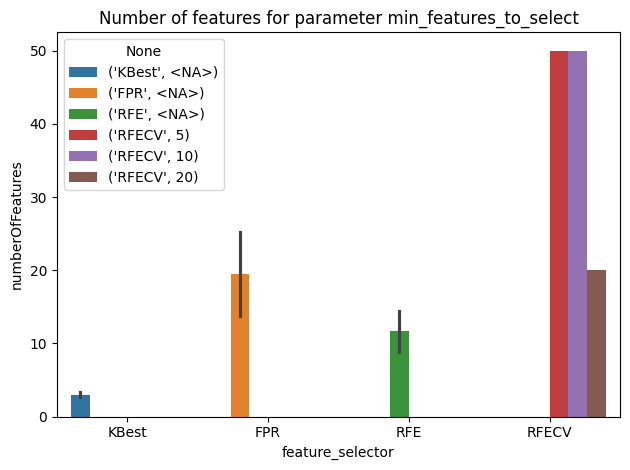

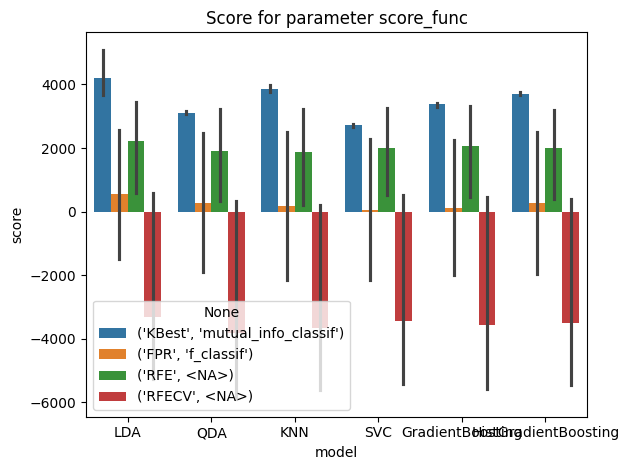

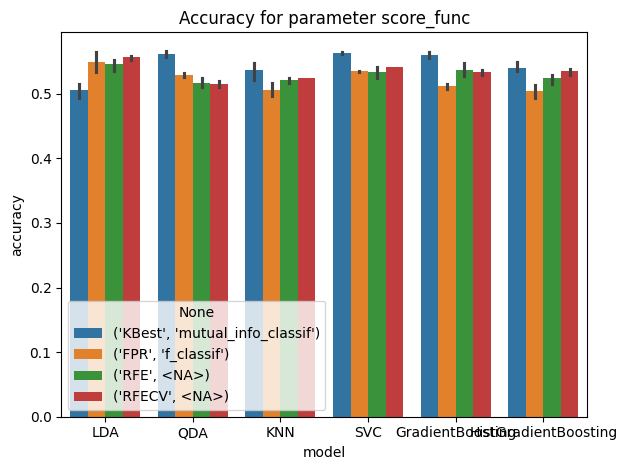

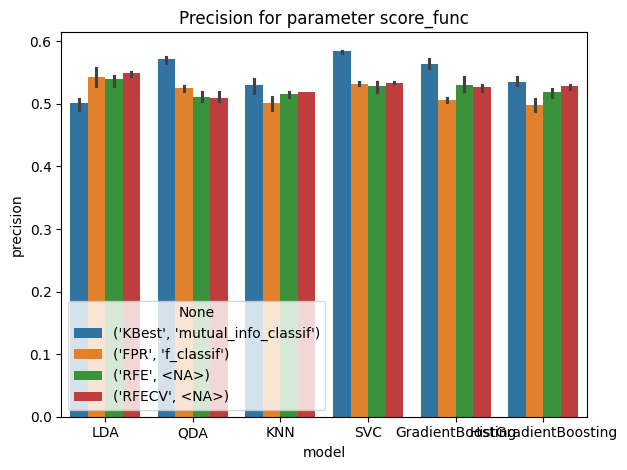

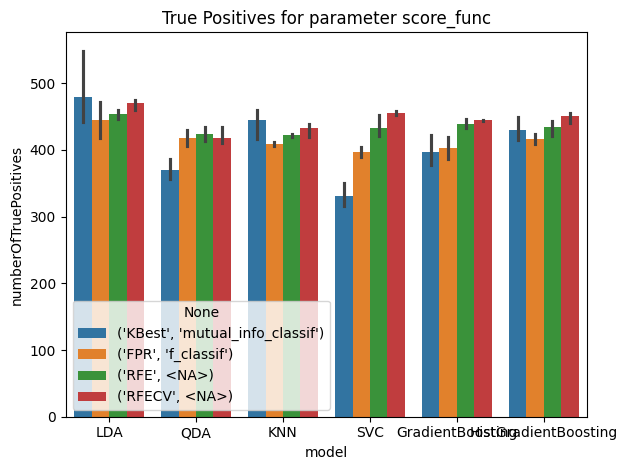

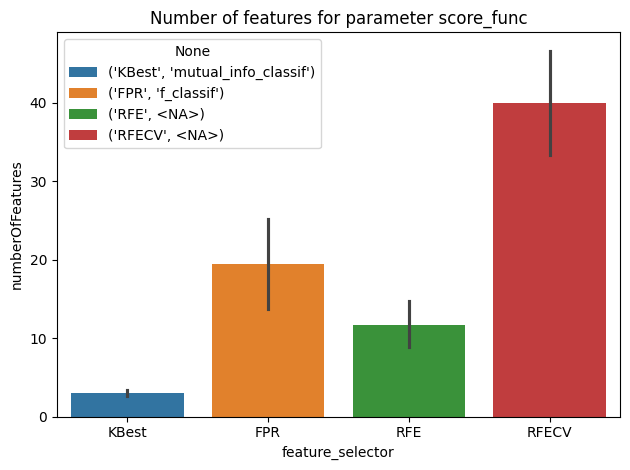

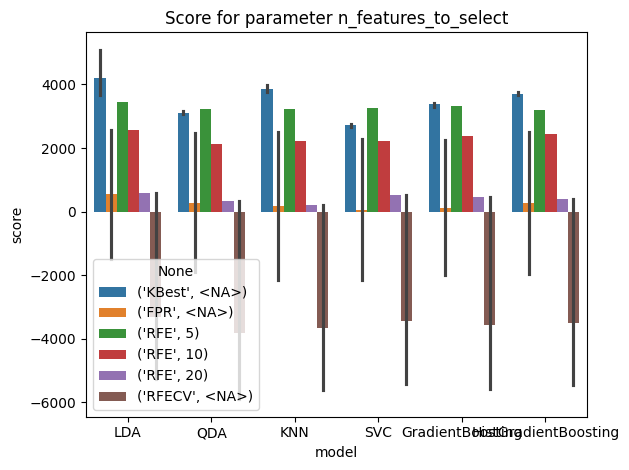

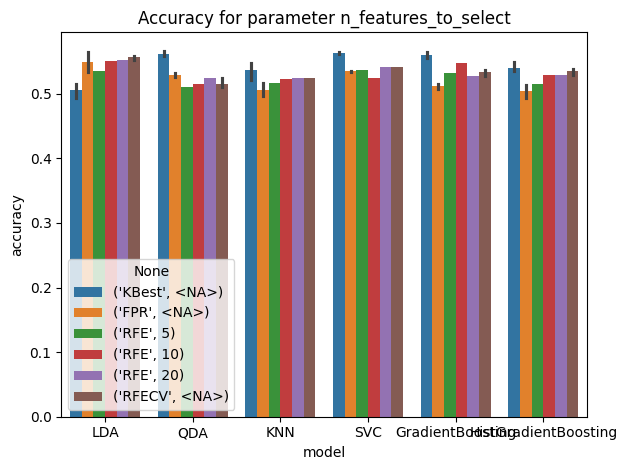

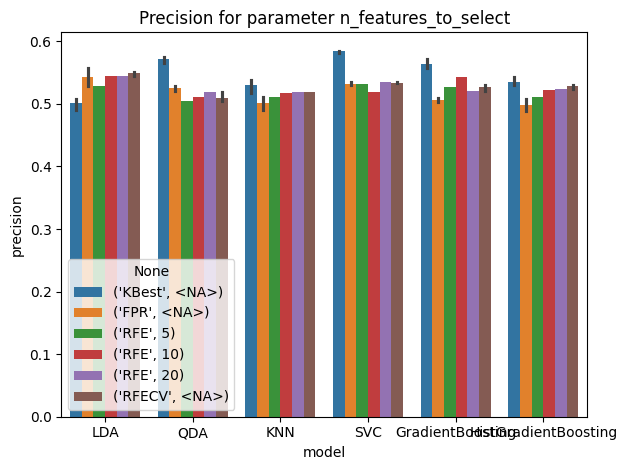

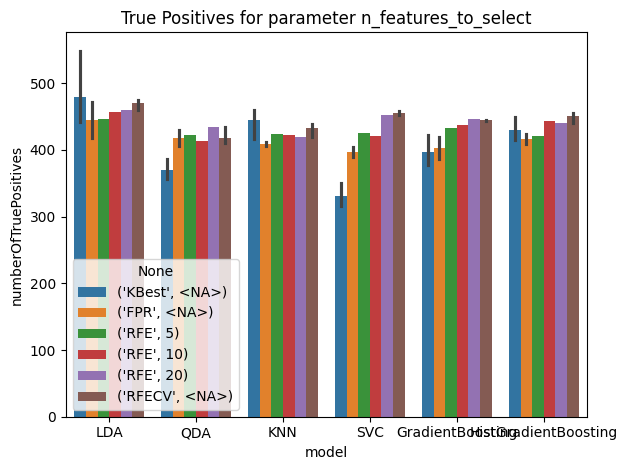

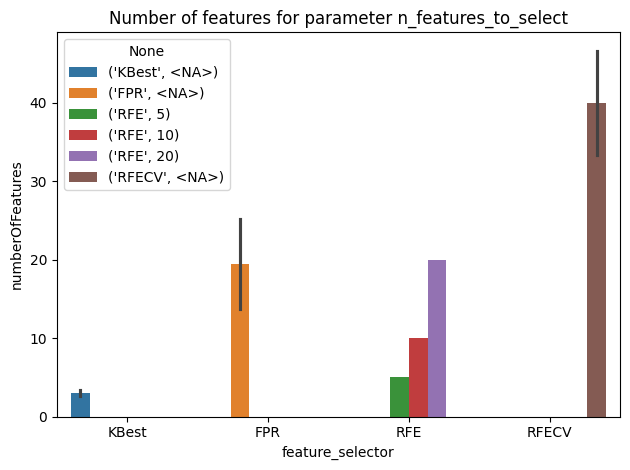

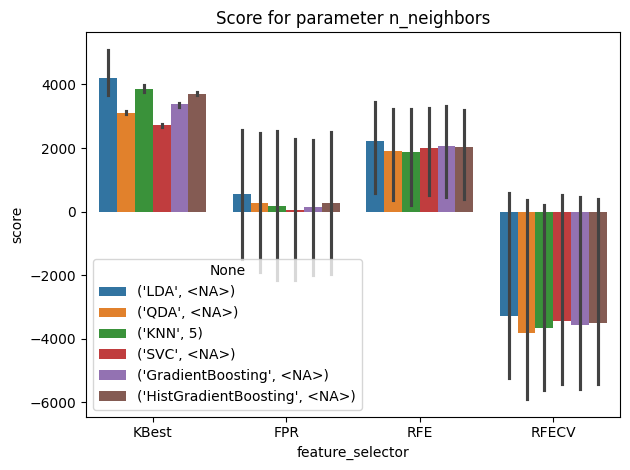

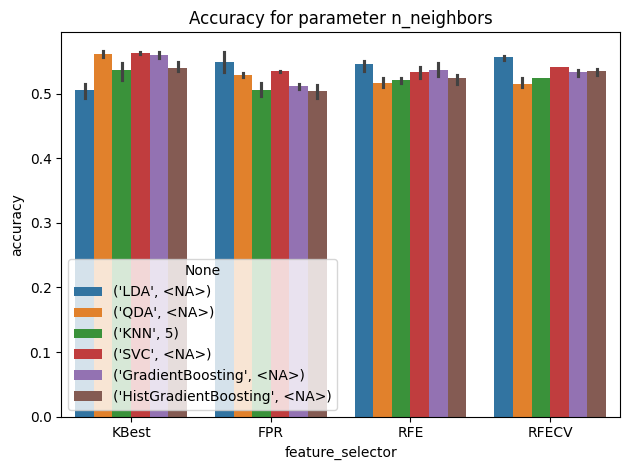

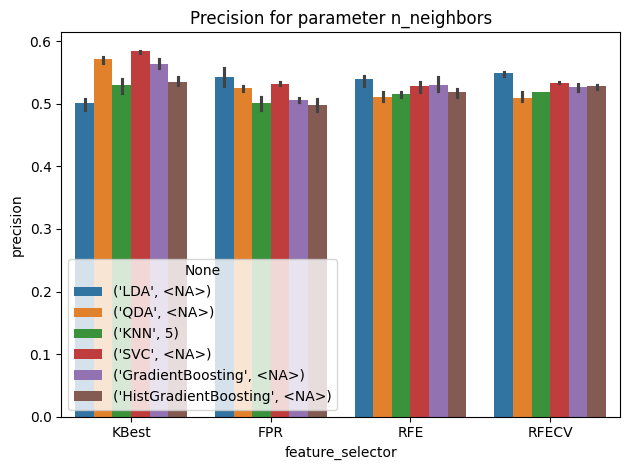

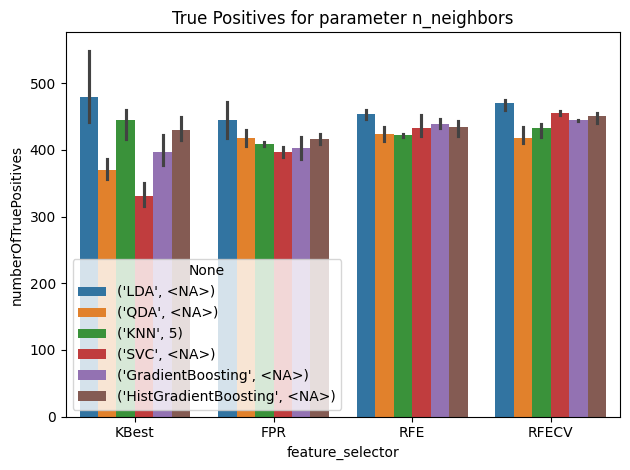

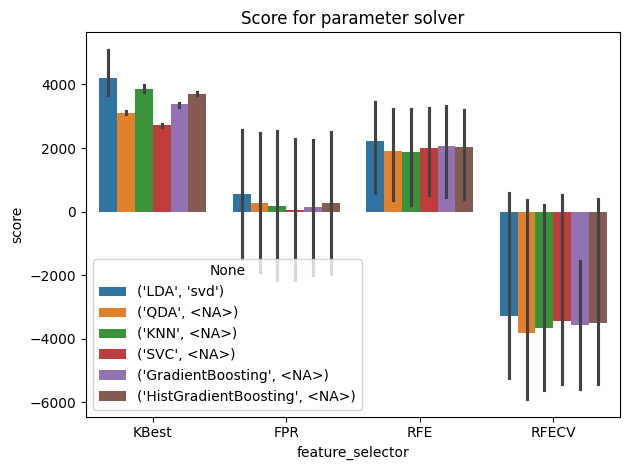

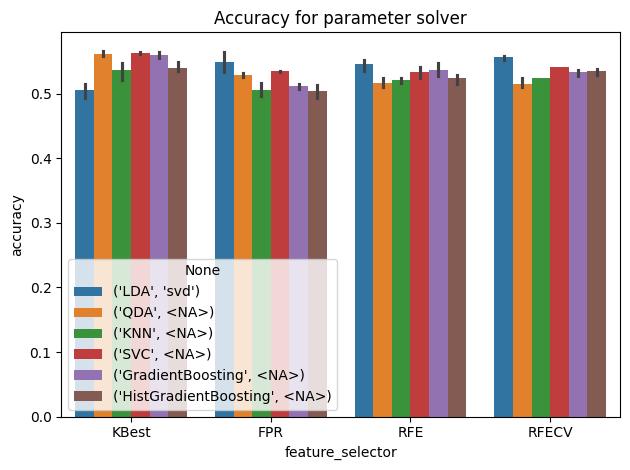

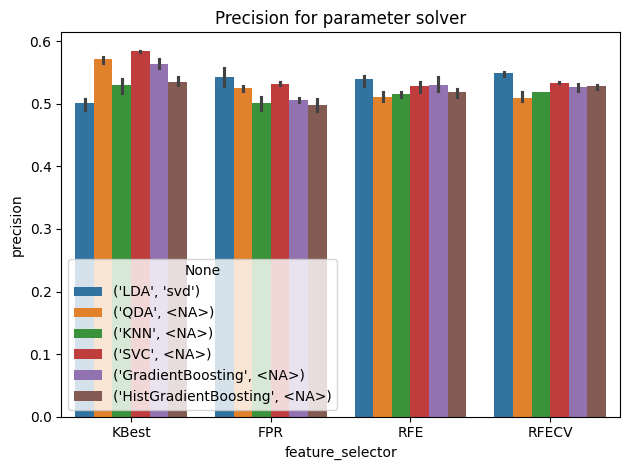

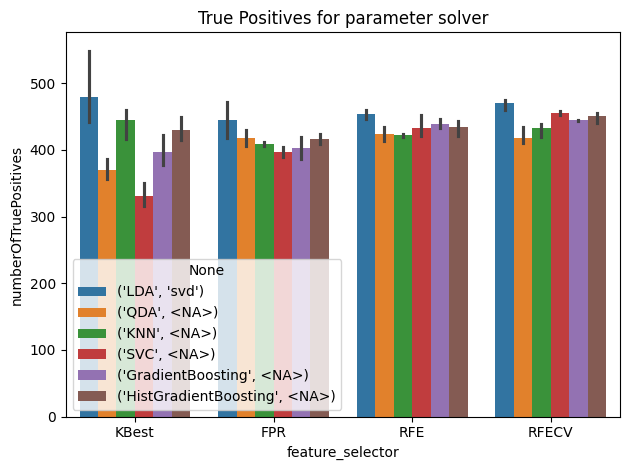

CPU times: total: 16 s
Wall time: 30.3 s


In [ ]:
%%time
processedResultsDf, parameters = functions.extractParameterResults(
    resultsDf, models, featureSelectors
)
functions.drawParameterResultsBarplot(processedResultsDf, parameters)

### Score/Accuracy by number of features

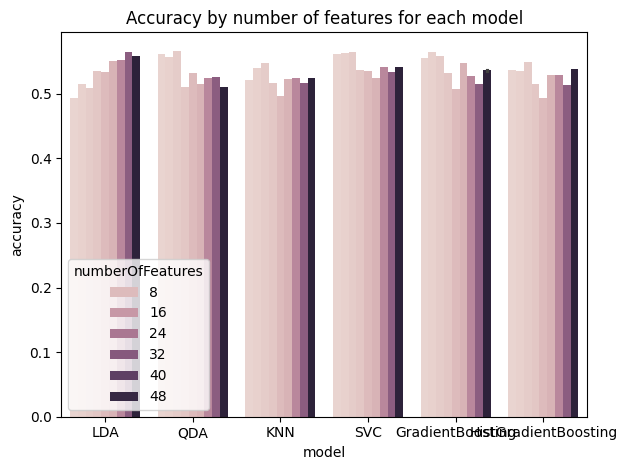

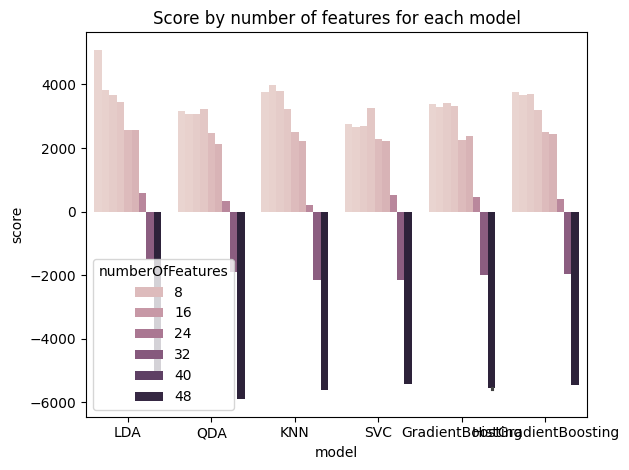

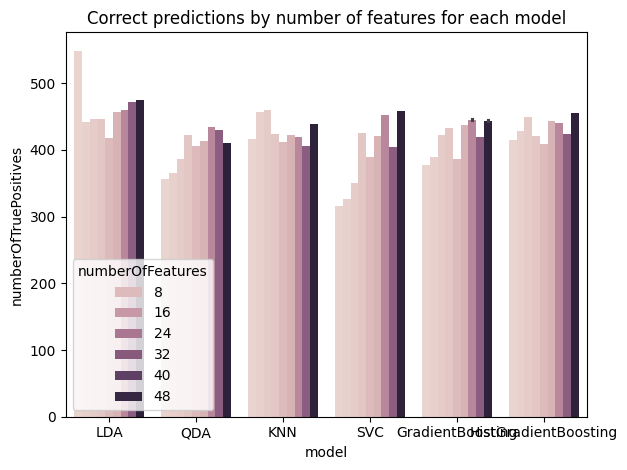

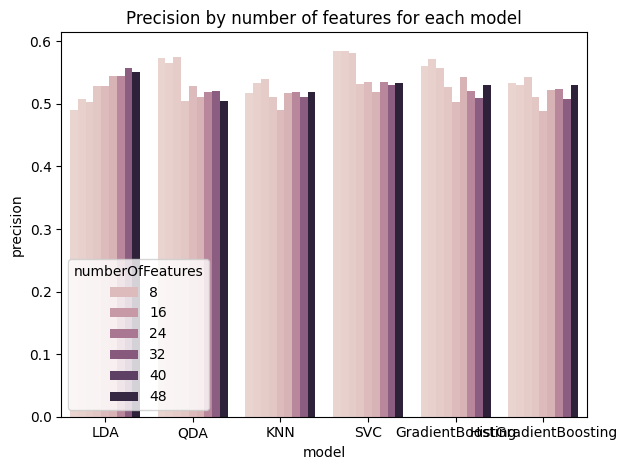

In [ ]:
functions.drawResultsPerNumberOfFeatures(processedResultsDf)

### Final Results for Feature Selectors

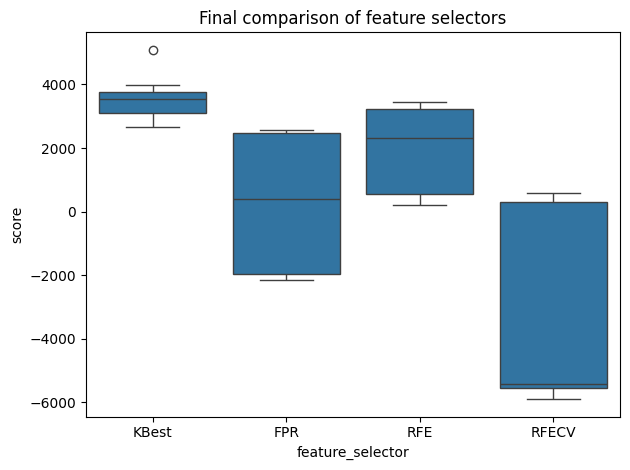

In [ ]:
plt.title("Final comparison of feature selectors")
sns.boxplot(data=processedResultsDf, x="feature_selector", y="score")

plt.tight_layout()
plt.show()

### Final Results for Models

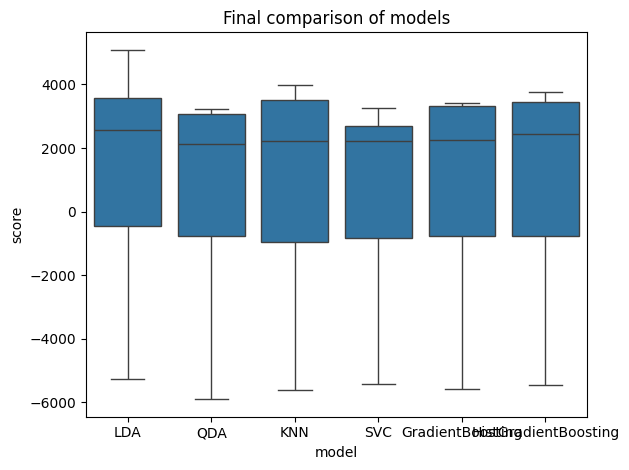

In [ ]:
plt.title("Final comparison of models")
sns.boxplot(data=processedResultsDf, x="model", y="score")

plt.tight_layout()
plt.show()

### Final Results

In [ ]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 821 µs


In [ ]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures model  \
0   5090                    549  0.492727   0.490617                 2   LDA   

    model_parameters feature_selector  \
0  {'solver': 'svd'}            KBest   

                                 selector_parameters selector_parameters_cv  \
0  {'score_func': <function mutual_info_classif a...                   <NA>   

  selector_parameters_k selector_parameters_alpha  \
0                     2                      <NA>   

  selector_parameters_estimator selector_parameters_step  \
0                          <NA>                     <NA>   

  selector_parameters_min_features_to_select selector_parameters_score_func  \
0                                       <NA>            mutual_info_classif   

  selector_parameters_n_features_to_select model_parameters_n_neighbors  \
0                                     <NA>                         <NA>   

  model_parameters_solver  
0                     svd